# Importación de Librerías y Configuración


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Carga y Exploración Inicial del Dataset de bmw_original


In [2]:
#Carga del dataset
bmw_original = pd.read_csv("bmw_dataset.csv")

In [3]:
bmw_original.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


Verificamos que no hay duplicados en el dataset:

In [5]:
#Verificamos si hay duplicados en el dataset:
bmw_original[bmw_original.duplicated(keep='first')]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


Hacemos un .info para obtener información sobre el tipo de datos.

Inicialmente, observamos que hay:

*   **Variables categóricas**: marca, modelo, fecha_registro, tipo_gasolina, color, tipo_coche, volante_regulable, aire_acondicionado, camara_trasera, asientos_traseros_plegables, elevalunas_electrico, bluetooh,alerta_lim_velocidad,fecha_venta
*   **Variables numéricas**: km, potencia, precio
*   **Variables boleanas**: gps




In [6]:
bmw_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

*Observaciones* a tener en cuenta:


*   Algunas variables categóricas podemos codificarlas en boleanas, ya que toman valores de True o False. Son las siguientes:

  1.   volante_regulable
  2.   aire_acondicionado
  1.   camara_trasera
  2.   asientos_traseros_plegables
  1.   elevalunas_electrico
  1.   bluetooth
  2.   alerta_lim_velocidad
*   fecha_registro y fecha_venta podrían convertirse a formato de fecha (datetime).




Por ahora, transformamos las columnas fecha_registro y fecha_venta a datatime con pd.to_datatime

In [7]:
for col in ["fecha_registro", "fecha_venta"]:
  bmw_original[col] = pd.to_datetime(bmw_original[col])

In [8]:
bmw_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4398 non-null   object        
 7   tipo_coche                   3383 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4357 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  1452 non-null 

In [9]:
bmw_original.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


Creamos la variable antigüedad restando las columnas fecha_venta y fecha_registro y la expresamos en años


In [10]:
bmw_original['antiguedad'] = (bmw_original['fecha_venta'] - bmw_original['fecha_registro']).dt.days / 365.25

In [11]:
bmw_original.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antiguedad
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,5.916496
1,BMW,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01,NaN
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01,5.837098
3,BMW,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01,NaN
4,BMW,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01,NaN


# Preguntas del cuestionario

## 1. ¿Qué columnas eliminaron inicialmente del dataset y por qué?


In [13]:
#Las columnas del dataset son:
columnas = bmw_original.columns

columnas

Index(['marca', 'modelo', 'km', 'potencia', 'fecha_registro', 'tipo_gasolina',
       'color', 'tipo_coche', 'volante_regulable', 'aire_acondicionado',
       'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico',
       'bluetooth', 'gps', 'alerta_lim_velocidad', 'precio', 'fecha_venta',
       'antiguedad'],
      dtype='object')

### ANÁLISIS INICIAL DE COLUMNAS

#### MARCA

In [14]:
#Observamos los valores que se toman en la columna MARCA. Todos son BMW o nulos.
bmw_original["marca"].value_counts(dropna=False)

marca
BMW    3873
NaN     970
Name: count, dtype: int64

Estamos analizando datos sobre coches cuya marca es BMW. Por tanto, aunque la columna contenga nulos, asumimos que TODOS los coches son marca BMW (así lo indica el nombre del archivo .csv donde tenemos los datos originales).

Al ser todos los coches de la misma marca, dicha columna no aporta variabilidad ni poder explicativo al modelo.

Podemos eliminarla.





#### KM

In [15]:
#Filas que tengan nulos en la columna km

bmw_original[bmw_original['km'].isnull()]

#Solamente hay dos nulos en la columna km. Decidimos no eliminar la columna ya que, probablemente, guarde una especial relación con el target.
#Lo analizaremos más adelante.

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antiguedad
459,BMW,520,NaN,135.0,2012-12-01,diesel,black,NaN,True,True,True,False,True,True,True,True,20300.0,2018-02-01,5.169062
4811,BMW,X3,NaN,190.0,NaT,diesel,blue,van,True,True,True,True,True,False,True,True,19500.0,2018-07-01,NaN


#### POTENCIA

In [16]:
bmw_original[bmw_original['potencia'].isnull()]

#Tampoco eliminamos la columna potencia por la misma razón.

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antiguedad
181,BMW,525,106054.0,NaN,2014-05-01,diesel,black,estate,False,True,False,NaN,False,False,True,True,18700.0,2018-03-01,3.832991


#### FECHA_REGISTRO

In [17]:
print(f"Nulos en la columna fecha_registro:",bmw_original['fecha_registro'].isnull().sum())
print(f"Porcentaje de nulos en fecha_registro:",round(bmw_original['fecha_registro'].isnull().sum()/len(bmw_original)*100,2),"%")

#La columna fecha_registro tiene 2423 nulos, que representan más de la mitad de los registros para esta columna.
#Además, hemos usado esta columna para calcular la columna antigüedad.
#Consideramos que podemos prescindir de esta columna.

Nulos en la columna fecha_registro: 2423
Porcentaje de nulos en fecha_registro: 50.03 %


#### TIPO_GASOLINA

In [18]:
print(f"Nulos en la columna tipo_gasolina:",bmw_original['tipo_gasolina'].isnull().sum())

#La columna tipo_gasolina solo tiene 5 valores nulos.
#Los trataremos más adelante.
#Decidimos no eliminar la columna ya que puede guardar relación con el target.

Nulos en la columna tipo_gasolina: 5


#### COLOR

In [19]:
print(f"Nulos en la columna color:",bmw_original['color'].isnull().sum())
print(f"Porcentaje de nulos en color:",round(bmw_original['color'].isnull().sum()/len(bmw_original)*100,2),"%")

#La columna color tiene 445 nulos, que representan cerca de un 9% de los registros.
#Decidimos no eliminar la columna, ya que puede guardar relación con el target.
#Trataremos más adelante los nulos.


Nulos en la columna color: 445
Porcentaje de nulos en color: 9.19 %


#### TIPO_COCHE

In [20]:
print(f"Nulos en la columna tipo_coche:",bmw_original['tipo_coche'].isnull().sum())
print(f"Porcentaje de nulos en tipo_coche:",round(bmw_original['tipo_coche'].isnull().sum()/len(bmw_original)*100,2),"%")

#La columna tipo_coche tiene 1460 nulos, representando cerca de un 30% de los registros.
#Decidimos no eliminar la columna, ya que puede guardar relación con el target.
#Trataremos más adelante los nulos.


Nulos en la columna tipo_coche: 1460
Porcentaje de nulos en tipo_coche: 30.15 %


#### VOLANTE_REGULABLE

In [21]:
print(f"Nulos en la columna volante_regulable:",bmw_original['volante_regulable'].isnull().sum())
print(f"Porcentaje de nulos en volante_regulable:",round(bmw_original['volante_regulable'].isnull().sum()/len(bmw_original)*100,2),"%")

#Decidimos no eliminar la columna, ya que puede guardar relación con el target.
#Trataremos más adelante los nulos.


Nulos en la columna volante_regulable: 4
Porcentaje de nulos en volante_regulable: 0.08 %


#### AIRE_ACONDICIONADO

In [22]:
print(f"Nulos en la columna aire_acondicionado:",bmw_original['aire_acondicionado'].isnull().sum())
print(f"Porcentaje de nulos en aire_acondicionado:",round(bmw_original['aire_acondicionado'].isnull().sum()/len(bmw_original)*100,2),"%")

#Decidimos no eliminar la columna, ya que puede guardar relación con el target.
#Trataremos más adelante los nulos.


Nulos en la columna aire_acondicionado: 486
Porcentaje de nulos en aire_acondicionado: 10.04 %


#### CAMARA_TRASERA

In [23]:
print(f"Nulos en la columna camara_trasera:",bmw_original['camara_trasera'].isnull().sum())
print(f"Porcentaje de nulos en camara_trasera:",round(bmw_original['camara_trasera'].isnull().sum()/len(bmw_original)*100,2),"%")

#Decidimos no eliminar la columna, ya que puede guardar relación con el target.
#Trataremos más adelante los nulos.


Nulos en la columna camara_trasera: 2
Porcentaje de nulos en camara_trasera: 0.04 %


#### ASIENTOS TRASEROS PLEGABLES

In [24]:
print(f"Nulos en la columna asientos_traseros_plegables:",bmw_original['asientos_traseros_plegables'].isnull().sum())
print(f"Porcentaje de nulos en asientos_traseros_plegables:",round(bmw_original['asientos_traseros_plegables'].isnull().sum()/len(bmw_original)*100,2),"%")

#Decidimos eliminar la columna, ya que hay 3391 valores nulos, siendo un 70% de la muestra.


Nulos en la columna asientos_traseros_plegables: 3391
Porcentaje de nulos en asientos_traseros_plegables: 70.02 %


#### ELEVALUNAS_ELECTRICO

In [25]:
print(f"Nulos en la columna elevalunas_electrico:",bmw_original['elevalunas_electrico'].isnull().sum())
print(f"Porcentaje de nulos en elevalunas_electrico:",round(bmw_original['elevalunas_electrico'].isnull().sum()/len(bmw_original)*100,2),"%")

#Decidimos no eliminar la columna, ya que puede guardar relación con el target.
#Trataremos más adelante los nulos.


Nulos en la columna elevalunas_electrico: 2
Porcentaje de nulos en elevalunas_electrico: 0.04 %


#### COLUMNA_BLUETOOTH

In [26]:
print(f"Nulos en la columna bluetooth:",bmw_original['bluetooth'].isnull().sum())
print(f"Porcentaje de nulos en bluetooth:",round(bmw_original['bluetooth'].isnull().sum()/len(bmw_original)*100,2),"%")

#Decidimos no eliminar la columna, ya que puede guardar relación con el target.
#Trataremos más adelante los nulos.


Nulos en la columna bluetooth: 728
Porcentaje de nulos en bluetooth: 15.03 %


#### GPS

In [27]:
print(f"Nulos en la columna gps:",bmw_original['gps'].isnull().sum())
print(f"Porcentaje de nulos en gps:",round(bmw_original['gps'].isnull().sum()/len(bmw_original)*100,2),"%")

#Decidimos no eliminar la columna, ya que puede guardar relación con el target.
#Sin nulos.


Nulos en la columna gps: 0
Porcentaje de nulos en gps: 0.0 %


#### ALERTA_LIM_VELOCIDAD

In [28]:
print(f"Nulos en la columna alerta_lim_velocidad:",bmw_original['alerta_lim_velocidad'].isnull().sum())
print(f"Porcentaje de nulos en alerta_lim_velocidad:",round(bmw_original['alerta_lim_velocidad'].isnull().sum()/len(bmw_original)*100,2),"%")

#Decidimos no eliminar la columna, ya que puede guardar relación con el target.
#Trataremos más adelante los nulos.


Nulos en la columna alerta_lim_velocidad: 728
Porcentaje de nulos en alerta_lim_velocidad: 15.03 %


#### PRECIO

La columna precio es el target, por lo que no la eliminamos.

#### FECHA_VENTA

In [29]:
print(f"Nulos en la columna fecha_venta:",bmw_original['fecha_venta'].isnull().sum())
print(f"Porcentaje de nulos en fecha_venta:",round(bmw_original['fecha_venta'].isnull().sum()/len(bmw_original)*100,2),"%")

#La columna fecha_venta tiene 1 nulo. Hemos usado esta columna para calcular la columna antigüedad.
#Consideramos que podemos prescindir de esta columna de igual manera que fecha_registro.
#Eliminamos la columna.

Nulos en la columna fecha_venta: 1
Porcentaje de nulos en fecha_venta: 0.02 %


#### ANTIGUEDAD

In [30]:
print(f"Nulos en la columna antiguedad:",bmw_original['antiguedad'].isnull().sum())
print(f"Porcentaje de nulos en antiguedad:",round(bmw_original['antiguedad'].isnull().sum()/len(bmw_original)*100,2),"%")

#Hemos creado la columna antiguedad para expresar la antigüedad del coche en años, por lo que no la vamos a eliminar.
#Trataremos los nulos más adelante.

Nulos en la columna antiguedad: 2423
Porcentaje de nulos en antiguedad: 50.03 %


### ELIMINACIÓN INICIAL COLUMNAS

Tras este primer análisis, decidimos eliminar las columnas:


*   marca
*   fecha_registro
*   asientos_traseros_plegables
*   fecha_venta






In [31]:
#Hacemos primero una copia del dataset:
bmw = bmw_original.copy()

In [32]:
columnas_a_eliminar = ["marca", "fecha_registro", "asientos_traseros_plegables", "fecha_venta"]
bmw = bmw.drop(columnas_a_eliminar, axis=1)

In [33]:
bmw.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad
0,118,140411.0,100.0,diesel,black,NaN,True,True,False,True,NaN,True,NaN,11300.0,5.916496
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,NaN
2,320,183297.0,120.0,diesel,white,NaN,False,False,False,True,False,True,False,10200.0,5.837098
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,NaN,25100.0,NaN
4,425,97097.0,160.0,diesel,silver,NaN,True,True,False,False,True,True,True,33400.0,NaN


In [35]:
#Porcentaje de nulos por columna

bmw.isnull().mean() * 100


modelo                   0.061945
km                       0.041297
potencia                 0.020648
tipo_gasolina            0.103242
color                    9.188520
tipo_coche              30.146603
volante_regulable        0.082593
aire_acondicionado      10.035102
camara_trasera           0.041297
elevalunas_electrico     0.041297
bluetooth               15.032005
gps                      0.000000
alerta_lim_velocidad    15.032005
precio                   0.123890
antiguedad              50.030973
dtype: float64

## 2. Manejo de nulos, explicar qué se hizo con los nulos por cada columna


In [36]:
bmw.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad
0,118,140411.0,100.0,diesel,black,NaN,True,True,False,True,NaN,True,NaN,11300.0,5.916496
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,NaN
2,320,183297.0,120.0,diesel,white,NaN,False,False,False,True,False,True,False,10200.0,5.837098
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,NaN,25100.0,NaN
4,425,97097.0,160.0,diesel,silver,NaN,True,True,False,False,True,True,True,33400.0,NaN


In [37]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4840 non-null   object 
 1   km                    4841 non-null   float64
 2   potencia              4842 non-null   float64
 3   tipo_gasolina         4838 non-null   object 
 4   color                 4398 non-null   object 
 5   tipo_coche            3383 non-null   object 
 6   volante_regulable     4839 non-null   object 
 7   aire_acondicionado    4357 non-null   object 
 8   camara_trasera        4841 non-null   object 
 9   elevalunas_electrico  4841 non-null   object 
 10  bluetooth             4115 non-null   object 
 11  gps                   4843 non-null   bool   
 12  alerta_lim_velocidad  4115 non-null   object 
 13  precio                4837 non-null   float64
 14  antiguedad            2420 non-null   float64
dtypes: bool(1), float64(4

Calculamos el porcentaje de nulos por columna:

In [38]:
print("Porcentaje de nulos por columna:")
print(round(bmw.isnull().mean() * 100, 2).astype(str) + " %")


Porcentaje de nulos por columna:
modelo                   0.06 %
km                       0.04 %
potencia                 0.02 %
tipo_gasolina             0.1 %
color                    9.19 %
tipo_coche              30.15 %
volante_regulable        0.08 %
aire_acondicionado      10.04 %
camara_trasera           0.04 %
elevalunas_electrico     0.04 %
bluetooth               15.03 %
gps                       0.0 %
alerta_lim_velocidad    15.03 %
precio                   0.12 %
antiguedad              50.03 %
dtype: object


In [39]:
#Analizamos las columnas y vemos qué valores toman porcentualmente:
for col in bmw:
    print(f"\nValores para la columna: {col}\n")
    print(bmw[col].value_counts(dropna=False, normalize= True))
    print("-" * 50)


Valores para la columna: modelo

modelo
320                  0.155276
520                  0.130704
318                  0.117283
X3                   0.090440
116                  0.073921
                       ...   
216                  0.000206
220 Active Tourer    0.000206
 Active Tourer       0.000206
225 Active Tourer    0.000206
214 Gran Tourer      0.000206
Name: proportion, Length: 77, dtype: float64
--------------------------------------------------

Valores para la columna: km

km
54433.0     0.000413
104005.0    0.000413
159093.0    0.000413
180606.0    0.000413
99768.0     0.000413
              ...   
39743.0     0.000206
49832.0     0.000206
19633.0     0.000206
27920.0     0.000206
65689.0     0.000206
Name: proportion, Length: 4785, dtype: float64
--------------------------------------------------

Valores para la columna: potencia

potencia
135.0    0.182119
120.0    0.162090
85.0     0.130291
100.0    0.117696
105.0    0.093124
           ...   
412.0    0.000206


Analizamos columna a columna y trataremos los nulos:

Para el análisis, distinguiremos entre:
*   Variables que toman valores binarios (True y False)
*   Variables categóricas
*   Variables numéricas



### Nulos de variables que toman valores binarias (True y False)

In [41]:
variables_binarias = ["gps", "volante_regulable", "aire_acondicionado", "camara_trasera", "elevalunas_electrico", "bluetooth", "alerta_lim_velocidad"]

print("Porcentaje de nulos por columna de las variables binarias:")
print(round(bmw[variables_binarias].isnull().mean() * 100, 2).astype(str) + " %")


Porcentaje de nulos por columna de las variables binarias:
gps                       0.0 %
volante_regulable        0.08 %
aire_acondicionado      10.04 %
camara_trasera           0.04 %
elevalunas_electrico     0.04 %
bluetooth               15.03 %
alerta_lim_velocidad    15.03 %
dtype: object


In [42]:
#Comprobamos que los valores que toman las variables binarias son estrictamente True o False. Queremos evitar valores inconsistentes como true, treu, flase, etc:
for col in variables_binarias:
  print(bmw[col].value_counts(dropna=False))
  print("-" * 50)

gps
True     4514
False     329
Name: count, dtype: int64
--------------------------------------------------
volante_regulable
True     2662
False    2177
NaN         4
Name: count, dtype: int64
--------------------------------------------------
aire_acondicionado
True     3465
False     892
NaN       486
Name: count, dtype: int64
--------------------------------------------------
camara_trasera
False    3864
True      977
NaN         2
Name: count, dtype: int64
--------------------------------------------------
elevalunas_electrico
False    2612
True     2229
NaN         2
Name: count, dtype: int64
--------------------------------------------------
bluetooth
False    3119
True      996
NaN       728
Name: count, dtype: int64
--------------------------------------------------
alerta_lim_velocidad
True     2240
False    1875
NaN       728
Name: count, dtype: int64
--------------------------------------------------


**ESTRATEGIAS PARA IMPUTAR NULOS:**

* Imputar columnas con pocos nulos (volante_regulable, camara_trasera, elevalunas_electrico): Dado que los nulos son insignificantes (<0.1 %), imputaremos con la moda. La probabilidad de introducir sesgos es ínfima.

* Imputar nulos de columnas con mayor % de nulos (aire_acondicionado, alerta_lim_velocidad y bluetooth): Estas tienen más del 10 % de nulos, por lo que puede haber un sesgo si imputamos directamente con la moda. Usaremos una imputación proporcional. De esta manera, mantenemos la diversidad de categorias y minimizamos el sesgo hacia la moda. Es cierto que así introducimos una suposición de que los valores nulos se distribuyen como el resto de los datos, lo cual podría no ser cierto. Pero preferimos hacerlo así, a arriesgarnos a sobrerrepresentar la moda (imputando los nulos a la moda) o a perder registros en caso de eliminar los registros nulos.



* La columna gps no tiene nulos.



In [43]:
#Hacemos una copia antes de hacer cambios:
bmw2 = bmw.copy()

In [44]:
# Imputar con la moda para las columnas con pocos nulos:
bmw2['volante_regulable'].fillna(bmw2['volante_regulable'].mode()[0], inplace=True)
bmw2['camara_trasera'].fillna(bmw2['camara_trasera'].mode()[0], inplace=True)
bmw2['elevalunas_electrico'].fillna(bmw2['elevalunas_electrico'].mode()[0], inplace=True)

/var/folders/2x/z03nqwh50hs66m43dm829y140000gn/T/ipykernel_2311/3421513715.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bmw2['volante_regulable'].fillna(bmw2['volante_regulable'].mode()[0], inplace=True)
/var/folders/2x/z03nqwh50hs66m43dm829y140000gn/T/ipykernel_2311/3421513715.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_sile

In [45]:
#Creamos una función que impute los valores nulos de una columna proporcionalmente según la distribución de los valores no nulos:
def imputar_nulos_proporcionalmente(dataframe, columna):
    """
    Argumentos de la función:
        dataframe (pd.DataFrame): El DataFrame con los datos.
        columna (str): Nombre de la columna a imputar.

    Return:
        pd.DataFrame: DataFrame con los valores imputados.
    """
    # Calcular el número de valores nulos
    numero_nulos = dataframe[columna].isnull().sum()

    # Obtener los valores no nulos únicos de la columna
    valores_posibles = dataframe[columna].dropna()

    # Generar valores imputados proporcionalmente:
    # np.random.choice: selecciona valores aleatorios de la lista de valores posibles
    # size = numero_nulos: genera exactamente tantos valores imputados propocionalmente como valores nulos haya.
    # Esto hace que respete la proporción sin introducir sesgos:
    valores_imputados_proporcionalmente = np.random.choice(valores_posibles, size=numero_nulos, replace=True)

    # Reemplaza los nulos con los valores imputados con .loc para localizar los nulos y asignarle los valores generados proporcionalmente:
    dataframe.loc[dataframe[columna].isnull(), columna] = valores_imputados_proporcionalmente

    return dataframe

In [46]:
# Imputación condicional de nulos de aquellas columnas con mayor % de nulos:
imputar_nulos_proporcionalmente(bmw2, "aire_acondicionado")
imputar_nulos_proporcionalmente(bmw2, "alerta_lim_velocidad")
imputar_nulos_proporcionalmente(bmw2, "bluetooth")

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad
0,118,140411.0,100.0,diesel,black,NaN,True,True,False,True,False,True,True,11300.0,5.916496
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,NaN
2,320,183297.0,120.0,diesel,white,NaN,False,False,False,True,False,True,False,10200.0,5.837098
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,False,25100.0,NaN
4,425,97097.0,160.0,diesel,silver,NaN,True,True,False,False,True,True,True,33400.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,diesel,black,NaN,False,True,False,False,False,True,False,14600.0,NaN
4839,218 Active Tourer,49832.0,100.0,diesel,grey,NaN,False,True,False,False,False,True,True,17500.0,3.167693
4840,218 Gran Tourer,19633.0,110.0,diesel,grey,van,False,True,False,False,False,True,True,17000.0,2.918549
4841,218 Active Tourer,27920.0,110.0,diesel,brown,van,True,True,False,False,False,True,True,22700.0,2.417522


Comprobamos que la función ha imputado los nulos:

In [47]:
for i in variables_binarias:
  print(f"Nulos en la columna {i}:",bmw2[i].isnull().sum())

Nulos en la columna gps: 0
Nulos en la columna volante_regulable: 0
Nulos en la columna aire_acondicionado: 0
Nulos en la columna camara_trasera: 0
Nulos en la columna elevalunas_electrico: 0
Nulos en la columna bluetooth: 0
Nulos en la columna alerta_lim_velocidad: 0


A continuación, la distribución antes y después de la imputación proporcional para cada variable binaria:

In [48]:
for i in variables_binarias:
  if i == "gps":
    continue      #Le indicamos al bucle que se salte la variable gps porque no tenía nulos:
  print(f"Distribución porcentual antes de la imputación proporcional:\n")
  print(bmw[i].value_counts(dropna=False, normalize= True)*100)

  print(f"\nDistribución porcentual tras la imputación proporcional sin nulos:\n")
  print(bmw2[i].value_counts(dropna=False, normalize= True)*100)

  print(f"\nDistribución en términos reales antes de la imputación proporcional:\n")
  print(bmw[i].value_counts(dropna=False))

  print(f"\nDistribución en términos reales tras la imputación proporcional sin nulos:\n")
  print(bmw2[i].value_counts(dropna=False))

  print("-" * 75)

Distribución porcentual antes de la imputación proporcional:

volante_regulable
True     54.965930
False    44.951476
NaN       0.082593
Name: proportion, dtype: float64

Distribución porcentual tras la imputación proporcional sin nulos:

volante_regulable
True     55.048524
False    44.951476
Name: proportion, dtype: float64

Distribución en términos reales antes de la imputación proporcional:

volante_regulable
True     2662
False    2177
NaN         4
Name: count, dtype: int64

Distribución en términos reales tras la imputación proporcional sin nulos:

volante_regulable
True     2666
False    2177
Name: count, dtype: int64
---------------------------------------------------------------------------
Distribución porcentual antes de la imputación proporcional:

aire_acondicionado
True     71.546562
False    18.418336
NaN      10.035102
Name: proportion, dtype: float64

Distribución porcentual tras la imputación proporcional sin nulos:

aire_acondicionado
True     79.867851
False    20.

Tras los cambios, es conveniente cambiar el datatype a bool de todas las variables binarias, ya que hemos imputado los nulos.

In [49]:
for i in variables_binarias:
  print(f"Datatype de {i}:",np.dtype(bmw2[i]))

Datatype de gps: bool
Datatype de volante_regulable: bool
Datatype de aire_acondicionado: object
Datatype de camara_trasera: bool
Datatype de elevalunas_electrico: bool
Datatype de bluetooth: object
Datatype de alerta_lim_velocidad: object


In [50]:
for i in variables_binarias:
  if np.dtype(bmw2[i]) == "bool":
    continue
  bmw2[i] = bmw2[i].astype(bool)

In [51]:
#hacemos una copia del dataset tras realizar los cambios:
bmw3 = bmw2.copy()

In [52]:
for i in variables_binarias:
  print(f"Datatype de {i}:",np.dtype(bmw3[i]))

Datatype de gps: bool
Datatype de volante_regulable: bool
Datatype de aire_acondicionado: bool
Datatype de camara_trasera: bool
Datatype de elevalunas_electrico: bool
Datatype de bluetooth: bool
Datatype de alerta_lim_velocidad: bool


In [53]:
bmw3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4840 non-null   object 
 1   km                    4841 non-null   float64
 2   potencia              4842 non-null   float64
 3   tipo_gasolina         4838 non-null   object 
 4   color                 4398 non-null   object 
 5   tipo_coche            3383 non-null   object 
 6   volante_regulable     4843 non-null   bool   
 7   aire_acondicionado    4843 non-null   bool   
 8   camara_trasera        4843 non-null   bool   
 9   elevalunas_electrico  4843 non-null   bool   
 10  bluetooth             4843 non-null   bool   
 11  gps                   4843 non-null   bool   
 12  alerta_lim_velocidad  4843 non-null   bool   
 13  precio                4837 non-null   float64
 14  antiguedad            2420 non-null   float64
dtypes: bool(7), float64(4

Convertimos las variables booleanas en numéricas (0/1) pensando en el futuro modelo de predicción del precio:


In [ ]:
bmw3[variables_binarias] = bmw3[variables_binarias].astype(int)


In [59]:
bmw3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4840 non-null   object 
 1   km                    4841 non-null   float64
 2   potencia              4842 non-null   float64
 3   tipo_gasolina         4838 non-null   object 
 4   color                 4398 non-null   object 
 5   tipo_coche            3383 non-null   object 
 6   volante_regulable     4843 non-null   int64  
 7   aire_acondicionado    4843 non-null   int64  
 8   camara_trasera        4843 non-null   int64  
 9   elevalunas_electrico  4843 non-null   int64  
 10  bluetooth             4843 non-null   int64  
 11  gps                   4843 non-null   int64  
 12  alerta_lim_velocidad  4843 non-null   int64  
 13  precio                4837 non-null   float64
 14  antiguedad            2420 non-null   float64
dtypes: float64(4), int64(

### Nulos de variables categóricas

#### Nulos columna MODELO

La columna MODELO es una columna categórica en la que hay alrededor de un 0,06% de valores nulos. Por lo que vemos razonable obtener la moda e imputarla a los nulos.

In [61]:
bmw3["modelo"].value_counts(dropna=False, normalize= True)

modelo
320                  0.155276
520                  0.130704
318                  0.117283
X3                   0.090440
116                  0.073921
                       ...   
216                  0.000206
220 Active Tourer    0.000206
 Active Tourer       0.000206
225 Active Tourer    0.000206
214 Gran Tourer      0.000206
Name: proportion, Length: 77, dtype: float64

In [62]:
#Antes de hacer cambios, hacemos una copia del dataset
bmw3_modelo = bmw3.copy()

In [63]:
#Imputamos la moda a los valores nulos de la columna MODELO

bmw3_modelo["modelo"].fillna(bmw3_modelo["modelo"].mode()[0], inplace=True)

/var/folders/2x/z03nqwh50hs66m43dm829y140000gn/T/ipykernel_2311/3732227752.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bmw3_modelo["modelo"].fillna(bmw3_modelo["modelo"].mode()[0], inplace=True)


In [64]:
bmw3_modelo["modelo"].isnull().any()

np.False_

#### Nulos columna TIPO_GASOLINA

La columna TIPO_GASOLINA es una columna categórica en la que hay alrededor de un 0.1% de valores nulos. Por lo que vemos razonable obtener la moda e imputarla a los nulos.

In [65]:
bmw3_modelo["tipo_gasolina"].value_counts(dropna=False, normalize= True)

tipo_gasolina
diesel           0.956225
petrol           0.039438
hybrid_petrol    0.001652
NaN              0.001032
Diesel           0.001032
electro          0.000619
Name: proportion, dtype: float64

In [66]:
#Antes de hacer cambios, hacemos una copia del dataset
bmw3_gasolina = bmw3_modelo.copy()

In [67]:
#Imputamos la moda a los valores nulos de la columna TIPO_GASOLINA

bmw3_gasolina["tipo_gasolina"].fillna(bmw3_gasolina["tipo_gasolina"].mode()[0], inplace=True)

/var/folders/2x/z03nqwh50hs66m43dm829y140000gn/T/ipykernel_2311/1421582821.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bmw3_gasolina["tipo_gasolina"].fillna(bmw3_gasolina["tipo_gasolina"].mode()[0], inplace=True)


In [68]:
bmw3_gasolina["tipo_gasolina"].isnull().any()

np.False_

#### Nulos columna COLOR



La columna COLOR es una columna categórica en la que hay alrededor de un 9% de valores nulos. Por lo que vemos razonable aplicar la función que hemos preparado antes para realizar una imputación proporcional.

De esta manera, mantenemos la diversidad de categorias y minimizamos el sesgo hacia la moda.

Es cierto que así introducimos una suposición de que los valores nulos se distribuyen como el resto de los datos, lo cual podría no ser cierto. Pero preferimos hacerlo así, a arriesgarnos a sobrerrepresentar la moda (imputando los nulos a la moda) o a perder un 9% de los registros en términos porcentuales (445 registros en términos reales) en caso de eliminar los registros nulos.

In [69]:
bmw3_gasolina["color"].value_counts(dropna=False, normalize= True)

color
black     0.309519
grey      0.220937
blue      0.133595
white     0.099938
NaN       0.091885
brown     0.062358
silver    0.060293
red       0.009705
beige     0.007640
green     0.002891
orange    0.001239
Name: proportion, dtype: float64

In [70]:
#Antes de hacer cambios, hacemos una copia del dataset
bmw3_color = bmw3_gasolina.copy()

In [71]:
imputar_nulos_proporcionalmente(bmw3_color, "color")


,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad
0,118,140411.0,100.0,diesel,black,NaN,1,1,0,1,0,1,1,11300.0,5.916496
1,M4,13929.0,317.0,petrol,grey,convertible,1,1,0,0,1,1,1,69700.0,NaN
2,320,183297.0,120.0,diesel,white,NaN,0,0,0,1,0,1,0,10200.0,5.837098
3,420,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,0,25100.0,NaN
4,425,97097.0,160.0,diesel,silver,NaN,1,1,0,0,1,1,1,33400.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,diesel,black,NaN,0,1,0,0,0,1,0,14600.0,NaN
4839,218 Active Tourer,49832.0,100.0,diesel,grey,NaN,0,1,0,0,0,1,1,17500.0,3.167693
4840,218 Gran Tourer,19633.0,110.0,diesel,grey,van,0,1,0,0,0,1,1,17000.0,2.918549
4841,218 Active Tourer,27920.0,110.0,diesel,brown,van,1,1,0,0,0,1,1,22700.0,2.417522


In [72]:
bmw3_color["color"].isnull().any()

np.False_

Comprobamos que la distribución no se ha alterado significativamente:

In [73]:
print(f"Distribución porcentual antes de la imputación proporcional:\n")
print(bmw3_gasolina["color"].value_counts(dropna=False, normalize= True)*100)

print(f"\nDistribución porcentual tras la imputación proporcional sin nulos:\n")
print(bmw3_color["color"].value_counts(dropna=False, normalize= True)*100)

print(f"\nDistribución en términos reales antes de la imputación proporcional:\n")
print(bmw3_gasolina["color"].value_counts(dropna=False))

print(f"\nDistribución en términos reales tras la imputación proporcional sin nulos:\n")
print(bmw3_color["color"].value_counts(dropna=False))

Distribución porcentual antes de la imputación proporcional:

color
black     30.951889
grey      22.093744
blue      13.359488
white      9.993805
NaN        9.188520
brown      6.235804
silver     6.029321
red        0.970473
beige      0.763989
green      0.289077
orange     0.123890
Name: proportion, dtype: float64

Distribución porcentual tras la imputación proporcional sin nulos:

color
black     34.317572
grey      24.365063
blue      14.433203
white     11.067520
brown      6.772662
silver     6.752013
red        1.094363
beige      0.784638
green      0.289077
orange     0.123890
Name: proportion, dtype: float64

Distribución en términos reales antes de la imputación proporcional:

color
black     1499
grey      1070
blue       647
white      484
NaN        445
brown      302
silver     292
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64

Distribución en términos reales tras la imputación proporcional sin nulos:

color
black     1662
grey 

#### Nulos columna TIPO_COCHE

In [74]:
bmw3_color["tipo_coche"].value_counts(dropna=False, normalize= True)

tipo_coche
NaN            0.301466
estate         0.228577
sedan          0.169523
suv            0.155895
hatchback      0.100764
subcompact     0.015899
coupe          0.015693
convertible    0.006195
van            0.005988
Name: proportion, dtype: float64

La columna TIPO_COCHE es una columna categórica en la que hay alrededor de un 30% de valores nulos. Dado el alto porcentaje de nulos optamos por imputar los nulos con una distribución proporcional con la función que hemos preparado antes.

De esta manera, mantenemos la diversidad de categorias y minimizamos el sesgo hacia la moda.

Es cierto que así introducimos una suposición de que los valores nulos se distribuyen como el resto de los datos, lo cual podría no ser cierto. Pero preferimos hacerlo así, a arriesgarnos a sobrerrepresentar la moda (imputando los nulos a la moda) o a perder un 30% de los registros en términos porcentuales (1460 registros en términos reales, una cantidad significativa viendo el tamaño del dataset) en caso de eliminar los registros nulos.

In [75]:
#Antes de hacer cambios, hacemos una copia del dataset
bmw3_coche = bmw3_color.copy()

In [76]:
imputar_nulos_proporcionalmente(bmw3_coche, "tipo_coche")

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad
0,118,140411.0,100.0,diesel,black,estate,1,1,0,1,0,1,1,11300.0,5.916496
1,M4,13929.0,317.0,petrol,grey,convertible,1,1,0,0,1,1,1,69700.0,NaN
2,320,183297.0,120.0,diesel,white,suv,0,0,0,1,0,1,0,10200.0,5.837098
3,420,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,0,25100.0,NaN
4,425,97097.0,160.0,diesel,silver,sedan,1,1,0,0,1,1,1,33400.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,diesel,black,suv,0,1,0,0,0,1,0,14600.0,NaN
4839,218 Active Tourer,49832.0,100.0,diesel,grey,hatchback,0,1,0,0,0,1,1,17500.0,3.167693
4840,218 Gran Tourer,19633.0,110.0,diesel,grey,van,0,1,0,0,0,1,1,17000.0,2.918549
4841,218 Active Tourer,27920.0,110.0,diesel,brown,van,1,1,0,0,0,1,1,22700.0,2.417522


Observamos que tras la imputación proporcional de los nulos, la distribución no se ha alterado significativamente. A continuación la comparativa en términos porcentuales y reales:

In [77]:
print(f"Distribución porcentual antes de la imputación proporcional:\n")
print(bmw3_color["tipo_coche"].value_counts(dropna=False, normalize= True)*100)

print(f"\nDistribución porcentual tras la imputación proporcional sin nulos:\n")
print(bmw3_coche["tipo_coche"].value_counts(dropna=False, normalize= True)*100)

print(f"\nDistribución en términos reales antes de la imputación proporcional:\n")
print(bmw3_color["tipo_coche"].value_counts(dropna=False))

print(f"\nDistribución en términos reales tras la imputación proporcional sin nulos:\n")
print(bmw3_coche["tipo_coche"].value_counts(dropna=False))

Distribución porcentual antes de la imputación proporcional:

tipo_coche
NaN            30.146603
estate         22.857733
sedan          16.952302
suv            15.589511
hatchback      10.076399
subcompact      1.589924
coupe           1.569275
convertible     0.619451
van             0.598802
Name: proportion, dtype: float64

Distribución porcentual tras la imputación proporcional sin nulos:

tipo_coche
estate         32.541813
sedan          23.972744
suv            22.630601
hatchback      14.639686
coupe           2.333265
subcompact      2.291968
convertible     0.805286
van             0.784638
Name: proportion, dtype: float64

Distribución en términos reales antes de la imputación proporcional:

tipo_coche
NaN            1460
estate         1107
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            76
convertible      30
van              29
Name: count, dtype: int64

Distribución en términos reales tras la imputación proporcional sin

Observamos que ya solo tenemos nulos en las variables numéricas.

In [78]:
bmw3_coche.isnull().any()

modelo                  False
km                       True
potencia                 True
tipo_gasolina           False
color                   False
tipo_coche              False
volante_regulable       False
aire_acondicionado      False
camara_trasera          False
elevalunas_electrico    False
bluetooth               False
gps                     False
alerta_lim_velocidad    False
precio                   True
antiguedad               True
dtype: bool

### Nulos de variables numéricas

Continuamos con el tratamiento de nulos de las variables numéricas:

In [79]:
bmw3_coche.isnull().any()

modelo                  False
km                       True
potencia                 True
tipo_gasolina           False
color                   False
tipo_coche              False
volante_regulable       False
aire_acondicionado      False
camara_trasera          False
elevalunas_electrico    False
bluetooth               False
gps                     False
alerta_lim_velocidad    False
precio                   True
antiguedad               True
dtype: bool

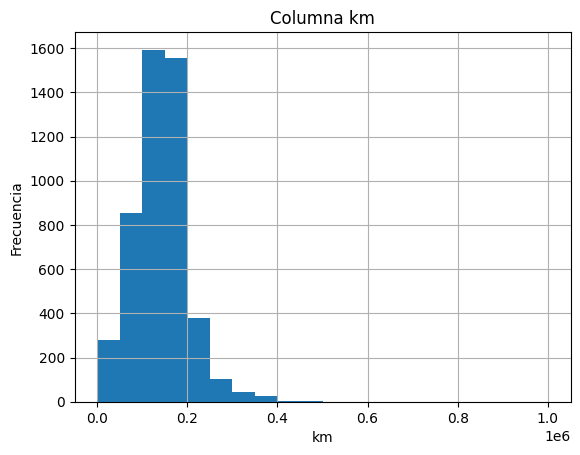

--------------------------------------------------


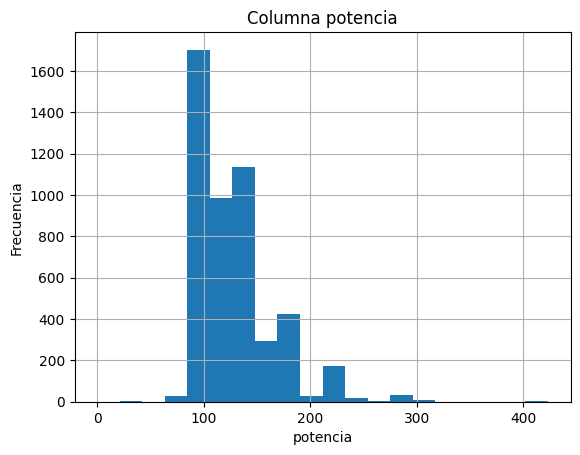

--------------------------------------------------


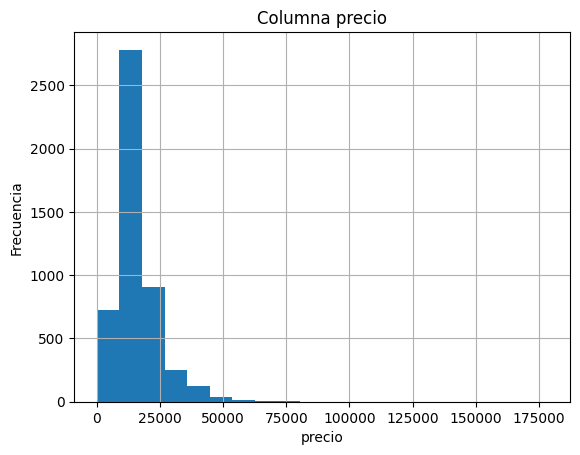

--------------------------------------------------


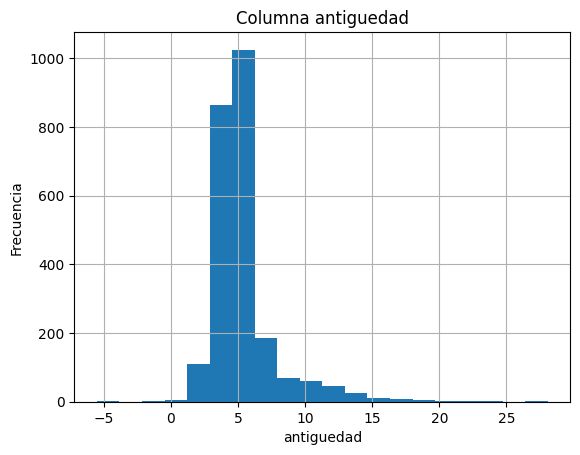

--------------------------------------------------


In [80]:
for i in ["km", "potencia", "precio", "antiguedad"]:
    plt.figure()  # Crea una nueva figura para cada histograma
    bmw3_coche[i].hist(bins=20)  # Crea el histograma de la columna
    plt.title(f"Columna {i}")  # Título para el gráfico
    plt.xlabel(i)  # Etiqueta para el eje X
    plt.ylabel("Frecuencia")  # Etiqueta para el eje Y
    plt.show()  # Muestra el histograma
    print("-" * 50)

In [81]:
#Hacemos un describe para ver las métricas de las variables numéricas:
bmw3_coche.describe()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad
count,4.841000e+03,4842.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4837.000000,2420.000000
mean,1.409593e+05,128.981826,0.550485,0.798679,0.201734,0.460252,0.241586,0.932067,0.546769,15831.920612,5.385633
std,6.020853e+04,38.994839,0.497496,0.401029,0.401336,0.498469,0.428089,0.251657,0.497859,9222.630708,2.526674
min,-6.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,-5.500342
25%,1.028840e+05,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10800.000000,4.076660
50%,1.410800e+05,120.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,14200.000000,4.835044
75%,1.752170e+05,135.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,18600.000000,5.831622
max,1.000376e+06,423.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,178500.000000,28.084873


Tratamos los outliers y valores atípicos antes de tratar los nulos de las variables numéricas:

1. Kilometraje (km):
* El mínimo es -64 km, lo que parece un valor anómalo, posiblemente un error de registro.
* El máximo es 1,000,376 km, un valor inusualmente alto, lo que también podría indicar un error o un coche con una gran cantidad de uso. Optamos por darle credibilidad ya que es posible.

2. Potencia (potencia):
* El mínimo es 0 CV, lo que podría ser un error de registro.
* El máximo es 423 CV, lo que refleja coches de alta potencia.

3. Precio (precio):
* El mínimo es 100, lo que podría ser un precio erróneo, ya que es anormalmente bajo.
* El máximo es 178,500, lo que podría indicar un coche de alta gama.

4. Antigüedad (antiguedad):
* El mínimo es -5.5 años, lo que claramente es un error, ya que no tiene sentido que un coche tenga una antigüedad negativa.
* El máximo es 28.08 años, lo que indica que algunos coches pueden ser muy antiguos.











In [82]:
# Imputamos los valores negativos en las columnas 'km' y 'antiguedad' como nulos
bmw3_coche.loc[bmw3_coche['km'] < 0, 'km'] = np.nan
bmw3_coche.loc[bmw3_coche['antiguedad'] < 0, 'antiguedad'] = np.nan

In [83]:
# Imputamos los valores anormalmente bajos de la columna 'potencia' como nulos
bmw3_coche.loc[bmw3_coche['potencia'] < 60, 'potencia'] = np.nan

In [84]:
# Consultamos los registros con precios anormalmente bajos. Encontramos que hay varios registros, por lo que la posibilidad de que sean errores de registro se reducen.
# Quizás son precios de venta en desguaces, tras accidentes o muy antiguos.
bmw3_coche.loc[bmw3_coche['precio'] < 500]

#Por lo que decidimos imputarlos como nulos.
bmw3_coche.loc[bmw3_coche['precio'] < 500, 'precio'] = np.nan

In [85]:
bmw3_coche.isnull().sum()

modelo                     0
km                         3
potencia                   4
tipo_gasolina              0
color                      0
tipo_coche                 0
volante_regulable          0
aire_acondicionado         0
camara_trasera             0
elevalunas_electrico       0
bluetooth                  0
gps                        0
alerta_lim_velocidad       0
precio                    21
antiguedad              2425
dtype: int64

#### Columna KM

La columna KM solo tiene 3 valores nulos.
Los imputaremos a la media.

In [86]:
bmw3_coche['km'].fillna(bmw3_coche['km'].mean(), inplace=True)

/var/folders/2x/z03nqwh50hs66m43dm829y140000gn/T/ipykernel_2311/1544529209.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bmw3_coche['km'].fillna(bmw3_coche['km'].mean(), inplace=True)


#### Columna POTENCIA

La columna POTENCIA solo tiene 4 valores nulos. Los imputamos a la moda.

In [87]:
bmw3_coche["potencia"].value_counts(dropna=False)

potencia
135.0    882
120.0    785
85.0     631
100.0    570
105.0    451
190.0    319
140.0    166
160.0    152
110.0    142
230.0    120
155.0     99
180.0     62
225.0     49
130.0     47
150.0     43
90.0      40
280.0     32
122.0     30
173.0     25
210.0     21
137.0     19
125.0     16
170.0     14
70.0      11
145.0      9
75.0       9
235.0      7
142.0      6
87.0       6
127.0      5
220.0      5
112.0      5
240.0      5
309.0      4
317.0      4
NaN        4
119.0      4
80.0       4
107.0      3
200.0      3
195.0      3
77.0       3
95.0       3
270.0      2
233.0      2
101.0      2
141.0      2
189.0      2
192.0      2
183.0      2
66.0       2
250.0      1
236.0      1
239.0      1
121.0      1
224.0      1
412.0      1
423.0      1
300.0      1
261.0      1
Name: count, dtype: int64

In [88]:
bmw3_coche['potencia'].fillna(bmw3_coche['potencia'].mode()[0], inplace=True)

/var/folders/2x/z03nqwh50hs66m43dm829y140000gn/T/ipykernel_2311/48866934.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bmw3_coche['potencia'].fillna(bmw3_coche['potencia'].mode()[0], inplace=True)


#### Columna PRECIO

La columna precio tiene 21 registros nulos. Al ser el target decidimos eliminarlas.

In [89]:
bmw3_coche.dropna(subset=['precio'], inplace=True)

#### Columna ANTIGUEDAD

La columna ANTIGUEDAD tiene 2425 registros nulos. Para la imputación de los nulos de esta columna, hemos pensado en lo siguiente:

* Calcular la media de antigüedad por modelo e imputar dicha media a cada modelo correspondiente. Es decir, calcular la media de antigüedad para el modelo 118, e imputarsela a aquellos coches con antigüedad nula cuyo modelo sea el 118.

**Inconveniente**: Los valores únicos que toma la variable modelo hacen un total de 76, siendo muchos de estos poco representativos como para calcular una media de antigüedad para cada uno de los modelos.





In [90]:
print(len(bmw3_coche["modelo"].unique()))

76


Para solventar este problema, se nos ocurre reagrupar los modelos en categorías más generales basándonos en el tamaño o estilo del coche. Por ejemplo:

* Compacto:	'118', '116', '114', '120', '125', '123', '135', 'M135', 'i3'
* Sedán pequeño:	'316', '318', '320', '328', '330', '335', '320 Gran Turismo', '325 Gran Turismo', '330 Gran Turismo'
* Sedán mediano:	'520', '525', '528', '530', '535', '535 Gran Turismo', '520 Gran Turismo', '530 Gran Turismo'
* Sedán premium:	'640', '650', '740', '750', 'ActiveHybrid 5', '730', '735', 'M550', 'M5'
* Coupé/Deportivo:	'M4', 'M3', '430', '420', '418 Gran Coupé', '430 Gran Coupé', '435', '435 Gran Coupé', '640 Gran Coupé', 'Z4', 'i8'
* SUV/4x4:	'X1', 'X3', 'X4', 'X5', 'X6', 'X6 M', 'X5 M', 'X5 M50'
* Familiar/Van:	'216 Active Tourer', '216 Gran Tourer', '218 Active Tourer', '218 Gran Tourer', '220 Active Tourer', '225'
* Otros:	Modelos no clasificados explícitamente arriba.


In [91]:
# Diccionario para mapear modelos a grupos
mapa_modelos = {
    '118': 'Compacto', '116': 'Compacto', '114': 'Compacto', '120': 'Compacto', '125': 'Compacto',
    '123': 'Compacto', '135': 'Compacto', 'M135': 'Compacto', 'i3': 'Compacto',
    '316': 'Sedán pequeño', '318': 'Sedán pequeño', '320': 'Sedán pequeño', '328': 'Sedán pequeño',
    '330': 'Sedán pequeño', '335': 'Sedán pequeño', '320 Gran Turismo': 'Sedán pequeño',
    '325 Gran Turismo': 'Sedán pequeño', '330 Gran Turismo': 'Sedán pequeño',
    '520': 'Sedán mediano', '525': 'Sedán mediano', '528': 'Sedán mediano', '530': 'Sedán mediano',
    '535': 'Sedán mediano', '535 Gran Turismo': 'Sedán mediano', '520 Gran Turismo': 'Sedán mediano',
    '530 Gran Turismo': 'Sedán mediano',
    '640': 'Sedán premium', '650': 'Sedán premium', '740': 'Sedán premium', '750': 'Sedán premium',
    'ActiveHybrid 5': 'Sedán premium', '730': 'Sedán premium', '735': 'Sedán premium',
    'M550': 'Sedán premium', 'M5': 'Sedán premium',
    'M4': 'Coupé/Deportivo', 'M3': 'Coupé/Deportivo', '430': 'Coupé/Deportivo', '420': 'Coupé/Deportivo',
    '418 Gran Coupé': 'Coupé/Deportivo', '430 Gran Coupé': 'Coupé/Deportivo', '435': 'Coupé/Deportivo',
    '435 Gran Coupé': 'Coupé/Deportivo', '640 Gran Coupé': 'Coupé/Deportivo', 'Z4': 'Coupé/Deportivo',
    'i8': 'Coupé/Deportivo',
    'X1': 'SUV/4x4', 'X3': 'SUV/4x4', 'X4': 'SUV/4x4', 'X5': 'SUV/4x4', 'X6': 'SUV/4x4',
    'X6 M': 'SUV/4x4', 'X5 M': 'SUV/4x4', 'X5 M50': 'SUV/4x4',
    '216 Active Tourer': 'Familiar/Van', '216 Gran Tourer': 'Familiar/Van', '218 Active Tourer': 'Familiar/Van',
    '218 Gran Tourer': 'Familiar/Van', '220 Active Tourer': 'Familiar/Van', '225': 'Familiar/Van'
}

# Aplicar el mapeo y creamos la columna GRUPO_MODELO:
bmw3_coche['grupo_modelo'] = bmw3_coche['modelo'].map(mapa_modelos).fillna('Otros')


In [92]:
bmw3_coche.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,grupo_modelo
0,118,140411.0,100.0,diesel,black,estate,1,1,0,1,0,1,1,11300.0,5.916496,Compacto
1,M4,13929.0,317.0,petrol,grey,convertible,1,1,0,0,1,1,1,69700.0,NaN,Coupé/Deportivo
2,320,183297.0,120.0,diesel,white,suv,0,0,0,1,0,1,0,10200.0,5.837098,Sedán pequeño
3,420,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,0,25100.0,NaN,Coupé/Deportivo
4,425,97097.0,160.0,diesel,silver,sedan,1,1,0,0,1,1,1,33400.0,NaN,Otros


In [93]:
bmw3_coche["grupo_modelo"].value_counts()

grupo_modelo
Sedán pequeño      1672
Sedán mediano      1062
SUV/4x4            1060
Compacto            569
Otros               248
Coupé/Deportivo     102
Sedán premium        78
Familiar/Van         31
Name: count, dtype: int64

Ahora que tenemos la nueva columna GRUPO_MODELO, podemos calcular la media de la antigüedad por grupo y luego imputarla a los modelos dentro de cada grupo.




In [94]:
#Usamos el método groupby para agrupar por grupo_modelo y calcular la media de antiguedad para cada grupo:

medias_antiguedad = bmw3_coche.groupby('grupo_modelo')['antiguedad'].mean()
print(medias_antiguedad)

grupo_modelo
Compacto           5.445430
Coupé/Deportivo    3.884668
Familiar/Van       2.846944
Otros              4.369170
SUV/4x4            5.272530
Sedán mediano      5.642235
Sedán pequeño      5.454661
Sedán premium      5.595346
Name: antiguedad, dtype: float64


In [95]:
#Imputamos la media calculada en medias_antiguedad a los valores nulos de antigüedad. Los guardamos en una nueva columna llamada ANTIGUEDAD_IMPUTADA que posteriormente desecharemos:
bmw3_coche['antiguedad_imputada'] = bmw3_coche['grupo_modelo'].map(medias_antiguedad)

In [96]:
# Reemplazamos los valores nulos de antigüedad con las medias imputadas
bmw3_coche['antiguedad'] = bmw3_coche['antiguedad'].fillna(bmw3_coche['antiguedad_imputada'])


In [97]:
#Eliminamos la columna ANTIGUEDAD_IMPUTADA
bmw3_coche = bmw3_coche.drop(columns=['antiguedad_imputada'])


In [98]:
bmw3_coche.isnull().any()

modelo                  False
km                      False
potencia                False
tipo_gasolina           False
color                   False
tipo_coche              False
volante_regulable       False
aire_acondicionado      False
camara_trasera          False
elevalunas_electrico    False
bluetooth               False
gps                     False
alerta_lim_velocidad    False
precio                  False
antiguedad              False
grupo_modelo            False
dtype: bool

Ahora tenemos nuestro dataset limpio de nulos.

In [99]:
bmw_clean = bmw3_coche.copy()

In [100]:
bmw_clean

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,grupo_modelo
0,118,140411.0,100.0,diesel,black,estate,1,1,0,1,0,1,1,11300.0,5.916496,Compacto
1,M4,13929.0,317.0,petrol,grey,convertible,1,1,0,0,1,1,1,69700.0,3.884668,Coupé/Deportivo
2,320,183297.0,120.0,diesel,white,suv,0,0,0,1,0,1,0,10200.0,5.837098,Sedán pequeño
3,420,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,0,25100.0,3.884668,Coupé/Deportivo
4,425,97097.0,160.0,diesel,silver,sedan,1,1,0,0,1,1,1,33400.0,4.369170,Otros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,diesel,black,suv,0,1,0,0,0,1,0,14600.0,2.846944,Familiar/Van
4839,218 Active Tourer,49832.0,100.0,diesel,grey,hatchback,0,1,0,0,0,1,1,17500.0,3.167693,Familiar/Van
4840,218 Gran Tourer,19633.0,110.0,diesel,grey,van,0,1,0,0,0,1,1,17000.0,2.918549,Familiar/Van
4841,218 Active Tourer,27920.0,110.0,diesel,brown,van,1,1,0,0,0,1,1,22700.0,2.417522,Familiar/Van


### Transformación logarítmica del precio



Para muchos mercados de vehículos de segunda mano, la distribución de los precios tiende a presentar una **asimetría positiva** (cola larga hacia valores altos). Esto puede dificultar que los algoritmos de regresión lineal y otros modelos aprovechen correctamente la relación entre precio y variables predictoras.

Con la transformación logarítmica:

1. **Reducción de la asimetría**  
   La variable resultante suele aproximarse más a una distribución normal, lo que mejora la estabilidad de los coeficientes en modelos lineales.

2. **Homogeneización de la varianza**  
   Se atenúa el efecto de heteroscedasticidad (variaciones de varianza a lo largo de distintos niveles de precio), favoreciendo supuestos de los modelos basados en mínimos cuadrados.

3. **Relaciones más lineales**  
   Variables que tenían una relación exponencial o de “crecimiento rápido” con el precio original pueden comportarse de forma más lineal tras el logaritmo.

4. **Mejora de métricas de error**  
   Al modelar "log_price", métricas como RMSE o MAE suelen ser más robustas, y después se pueden retransformar las predicciones para volver a la escala original.

A continuación, aplicamos la transformación:

In [105]:
# Creamos log_precio sin perder la columna precio original
bmw_clean["log_precio"] = np.log(bmw_clean["precio"] + 1)  # +1 para evitar log(0)

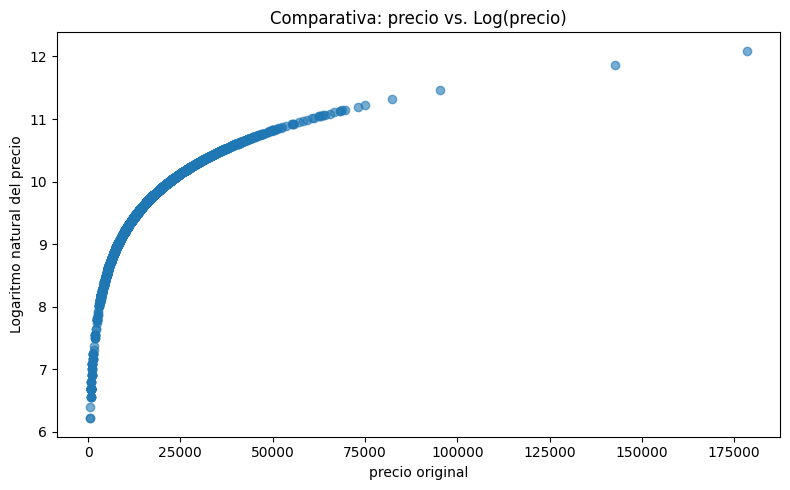

In [108]:
plt.figure(figsize=(8, 5))
plt.scatter(
    bmw_clean["precio"],
    bmw_clean["log_precio"],
    alpha=0.6
)
plt.xlabel("precio original")
plt.ylabel("Logaritmo natural del precio")
plt.title("Comparativa: precio vs. Log(precio)")
plt.tight_layout()
plt.show()


- Cada punto es un coche.

- El eje horizontal es el precio que ya conoces; el vertical, su logaritmo.

- Los valores muy altos “se comprimen”, reduciendo la dispersión en la zona alta y haciendo más legible la forma general de la nube de puntos. Esto confirma visualmente la reducción de asimetría y heteroscedasticidad sobre la que hablamos.

## 3. Análisis univariable, explicar alguna información interesante encontrada


### Columnas TIPO_COCHE y GRUPO_MODELO

El hecho de que las columnas tipo_coche y grupo_modelo sean similares sugiere que grupo_modelo ya captura de manera efectiva la información que tipo_coche proporciona, pero de una forma más condensada. Dado que hemos basado la creación de la columna grupo_modelo en la columna modelo, y que probablemente grupo_modelo agrupe la información de forma más relevante para el modelo predictivo del precio, eliminar tipo_coche podría ser una opción válida.

No obstante, optamos por analizar previamente cómo se comportan ambas columnas en relación con el precio, para ver si una contribuye más que la otra a la predicción del precio. Para hacer esto, hacemos un análisis de correlación y vemos si ambas columnas tienen un impacto significativo sobre el precio.

In [109]:
# Agrupar por tipo_coche y calcular la media del precio
print(bmw_clean.groupby('tipo_coche')['precio'].mean())
print("-"*50)
print(bmw_clean.groupby('grupo_modelo')['precio'].mean())

tipo_coche
convertible    16248.717949
coupe          20241.071429
estate         13811.210191
hatchback      14176.379066
sedan          16026.128472
subcompact     11351.351351
suv            19855.901189
van            14318.421053
Name: precio, dtype: float64
--------------------------------------------------
grupo_modelo
Compacto           10145.694200
Coupé/Deportivo    29085.294118
Familiar/Van       15383.870968
Otros              17116.935484
SUV/4x4            21485.943396
Sedán mediano      16924.387947
Sedán pequeño      11991.507177
Sedán premium      29687.179487
Name: precio, dtype: float64


En vista de los resultados obtenidos, consideramos que GRUPO_MODELO es una categoría más específica y que tiene un poder predictivo más fuerte (como parece ser por las medias de precio más diferenciadas).

De igual forma, la columna MODELO ha sido utilizada para crear la columna GRUPO_MODELO. Esto se hizo así debido a su alta cardinalidad y a la complejidad de lidiar con una columna con tantos valores únicos.

Consideramos que las categorías de la columna GRUPO_MODELO ya capturan la información sobre el tipo de coche y su segmentación de mercado, lo que hace que GRUPO_MODELO sea potencialmente una característica más útil para predecir el precio que TIPO_COCHE y MODELO.

Optamos por  eliminar la columna TIPO_COCHE y la columna MODELO:

In [110]:
#Hacemos una copia del dataset:
bmw_clean2 = bmw_clean.copy()

In [111]:
bmw_clean2 = bmw_clean.drop(columns=['tipo_coche','modelo'])

In [112]:
bmw_clean2

,km,potencia,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,grupo_modelo,log_precio
0,140411.0,100.0,diesel,black,1,1,0,1,0,1,1,11300.0,5.916496,Compacto,9.332646
1,13929.0,317.0,petrol,grey,1,1,0,0,1,1,1,69700.0,3.884668,Coupé/Deportivo,11.151970
2,183297.0,120.0,diesel,white,0,0,0,1,0,1,0,10200.0,5.837098,Sedán pequeño,9.230241
3,128035.0,135.0,diesel,red,1,1,0,1,1,1,0,25100.0,3.884668,Coupé/Deportivo,10.130663
4,97097.0,160.0,diesel,silver,1,1,0,0,1,1,1,33400.0,4.369170,Otros,10.416341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,39743.0,110.0,diesel,black,0,1,0,0,0,1,0,14600.0,2.846944,Familiar/Van,9.588845
4839,49832.0,100.0,diesel,grey,0,1,0,0,0,1,1,17500.0,3.167693,Familiar/Van,9.770013
4840,19633.0,110.0,diesel,grey,0,1,0,0,0,1,1,17000.0,2.918549,Familiar/Van,9.741027
4841,27920.0,110.0,diesel,brown,1,1,0,0,0,1,1,22700.0,2.417522,Familiar/Van,10.030164


### Distribución del precio

¿CÓMO SE DISTRIBUYEN LOS PRECIOS DE LOS COCHES EN EL DATASET?

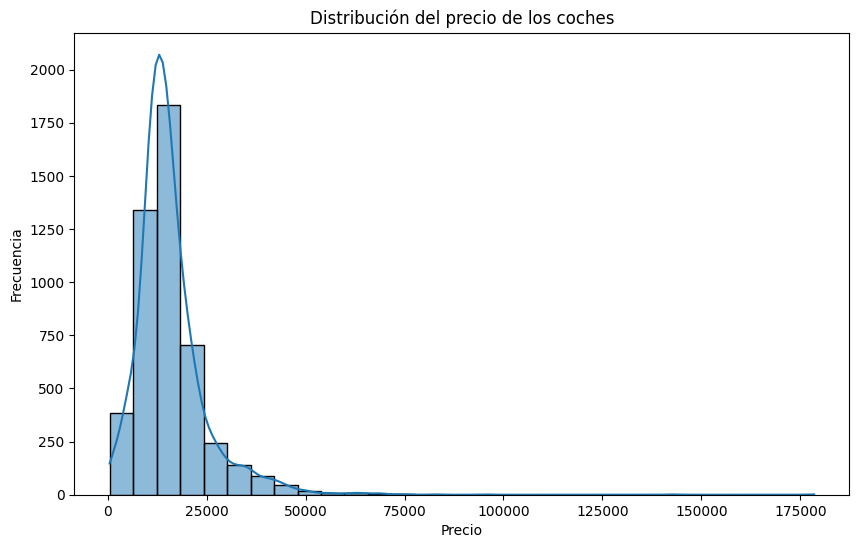

In [113]:
plt.figure(figsize=(10, 6))
sns.histplot(bmw_clean2['precio'], kde=True, bins=30)
plt.title('Distribución del precio de los coches')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

- Asimetría positiva (sesgo a la derecha): La mayoría de los coches tienen precios concentrados en un rango bajo (entre 10,000 y 30,000), mientras que hay valores más altos, aunque menos frecuentes, que se extienden hasta aproximadamente 175,000 unidades.

- Presencia de valores extremos: Aunque la mayoría de los precios están dentro de un rango razonable, los valores más altos representan coches de lujo o con características muy específicas, y podrían considerarse outliers.

- Modas visibles: Hay un pico claro en la distribución cerca del promedio, lo que sugiere que hay rangos de precios populares o accesibles.**texto en negrita**

### Distribución de la antigüedad

¿Qué tan antiguos son los coches en el dataset?

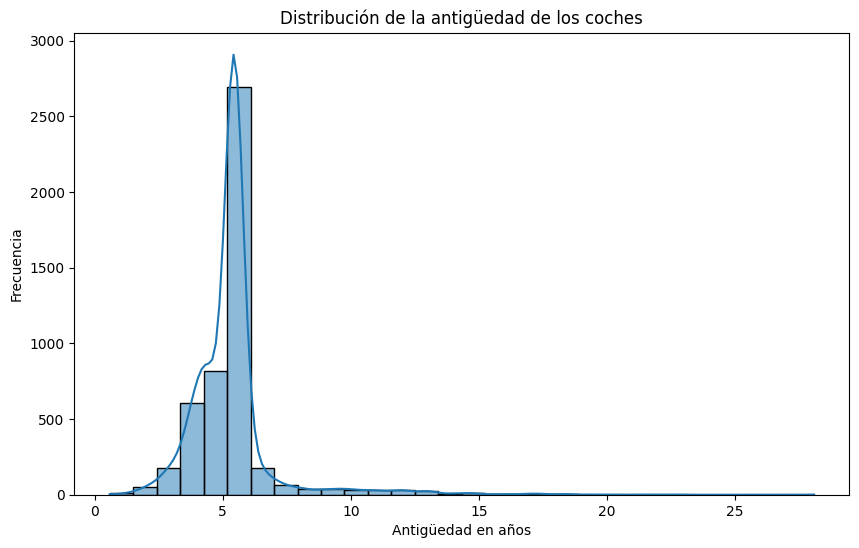

In [114]:
plt.figure(figsize=(10, 6))
sns.histplot(bmw_clean2['antiguedad'], kde=True, bins=30)
plt.title('Distribución de la antigüedad de los coches')
plt.xlabel('Antigüedad en años')
plt.ylabel('Frecuencia')
plt.show()

- Concentración de datos: La mayoría de los coches tienen entre 4 y 6 años de antigüedad. Esto sugiere que el mercado analizado está dominado por vehículos relativamente recientes.
Hay pocos coches con más de 10 años de antigüedad.
- Asimetría: La distribución es asimétrica positiva (sesgada hacia la derecha). Esto indica que existen pocos coches muy antiguos en comparación con la mayoría que son más nuevos.
- Outliers potenciales: Aunque no son muy prominentes, algunos coches con más de 15 años de antigüedad podrían considerarse outliers en este contexto, dependiendo de su proporción en el dataset.
- Conclusiones prácticas: El modelo predictivo del precio debe tomar en cuenta esta concentración en coches de menor antigüedad. Es probable que la antigüedad sea una variable significativa en la predicción del precio, especialmente porque los coches más nuevos suelen tener precios más altos.

### Distribución del kilometraje

¿Cuál es la tendencia en el kilometraje de los coches?

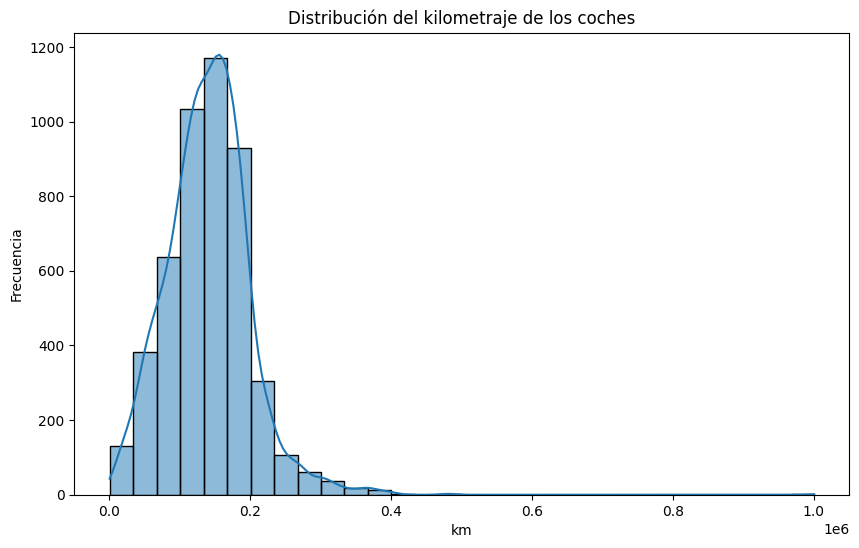

In [115]:
plt.figure(figsize=(10, 6))
sns.histplot(bmw_clean2['km'], kde=True, bins=30)
plt.title('Distribución del kilometraje de los coches')
plt.xlabel('km')
plt.ylabel('Frecuencia')
plt.show()

- El kilometraje está principalmente entre los 0 y 200,000 km, con una caída significativa después de este punto.
- Esto podría indicar que los coches con más de 200,000 km tienden a retirarse del mercado, posiblemente porque pierden atractivo para los compradores.

**Insights interesantes**:
- Relación entre precio y kilometraje:
    - Observando la distribución del kilometraje, la mayoría de los coches están por debajo de 200,000 km, lo que suele estar relacionado con coches en mejor estado o con menor uso.
    - En la distribución del precio, se observa que los valores altos son menos frecuentes, lo que puede implicar que los coches con precios elevados (posiblemente más nuevos o con menor desgaste) son una fracción pequeña del mercado. Esto sugiere una correlación inversamente proporcional esperada entre precio y kilometraje.

- Foco en coches recientes: En el gráfico de antigüedad, la concentración está entre 3 y 7 años, con muy pocos coches que superen los 15 años. Esto muestra una tendencia del mercado hacia coches más recientes. BMW es una marca premium que atrae a compradores interesados en coches modernos, lo que podría explicar esta concentración.

- Segmentación del mercado: La distribución del precio muestra que la mayoría de los coches se encuentra en rangos moderados (10,000-30,000 euros), pero también hay una cola hacia precios altos, lo que refleja un segmento más exclusivo. Combinando esto con el kilometraje y antigüedad, parece que los coches más caros suelen estar en mejores condiciones (menos antigüedad y kilometraje).

### Distribución de la potencia

¿Cuál es la tendencia en la potencia de los coches?

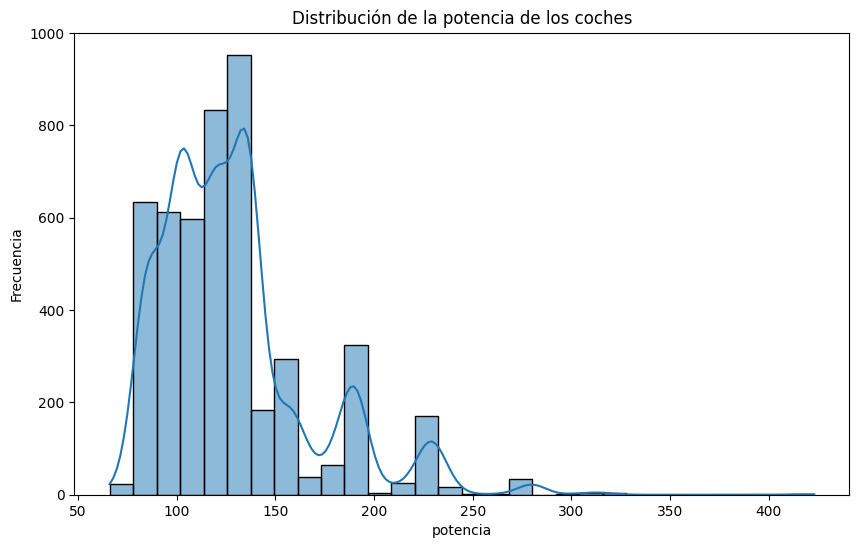

In [116]:
plt.figure(figsize=(10, 6))
sns.histplot(bmw_clean2['potencia'], kde=True, bins=30)
plt.title('Distribución de la potencia de los coches')
plt.xlabel('potencia')
plt.ylabel('Frecuencia')
plt.show()

- Distribución sesgada: La gráfica sugiere que la mayoría de los coches tienen una potencia entre 100 y 150 caballos (pico más alto en la distribución). A medida que aumenta la potencia, el número de coches disminuye progresivamente. Este es un patrón típico, ya que los vehículos de mayor potencia suelen ser más costosos y menos comunes.

- Densidad alta en el rango medio: La mayoría de los coches parecen estar diseñados para ofrecer un equilibrio entre potencia y consumo, representado en el rango de 100 a 200 caballos.

- Posibles coches premium: Los coches con potencias superiores a 300 caballos son poco frecuentes. Estos representan probablemente vehículos de alta gama, deportivos o de lujo.

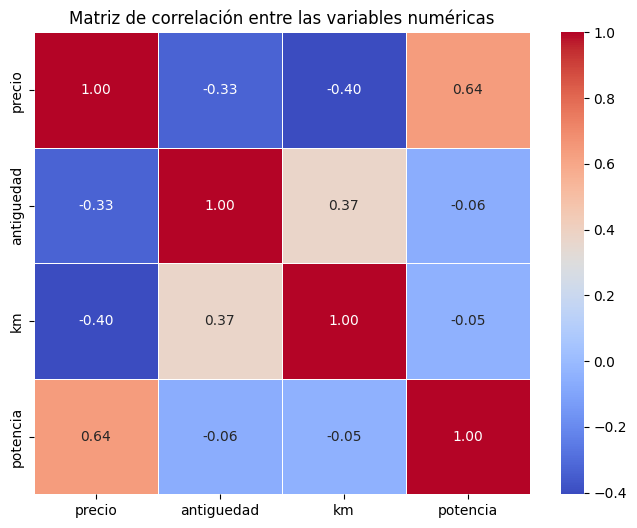

In [117]:
# Calcular la matriz de correlación
correlation_matrix = bmw_clean2[['precio', 'antiguedad', 'km','potencia']].corr()

# Visualizamos la matriz de correlación con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre las variables numéricas")
plt.show()

El precio de los coches está influenciado tanto por su kilometraje como por su antigüedad, con correlaciones negativas moderadas (-0.40 y -0.33 respectivamente). Esto respalda que los vehículos más usados y antiguos tienden a ser más económicos debido al desgaste y la depreciación.

También destaca la relación moderadamente fuerte entre potencia y precio (0.64). Esto indica que usualmente los coches de mayor potencia tienen un mayor precio.

Por otro lado, la relación positiva entre antigüedad y kilometraje (0.37) muestra que los coches más viejos suelen recorrer más distancia a lo largo de su vida útil.

### Distribución de grupo_modelo



¿Qué tipos de coches predominan en el dataset?

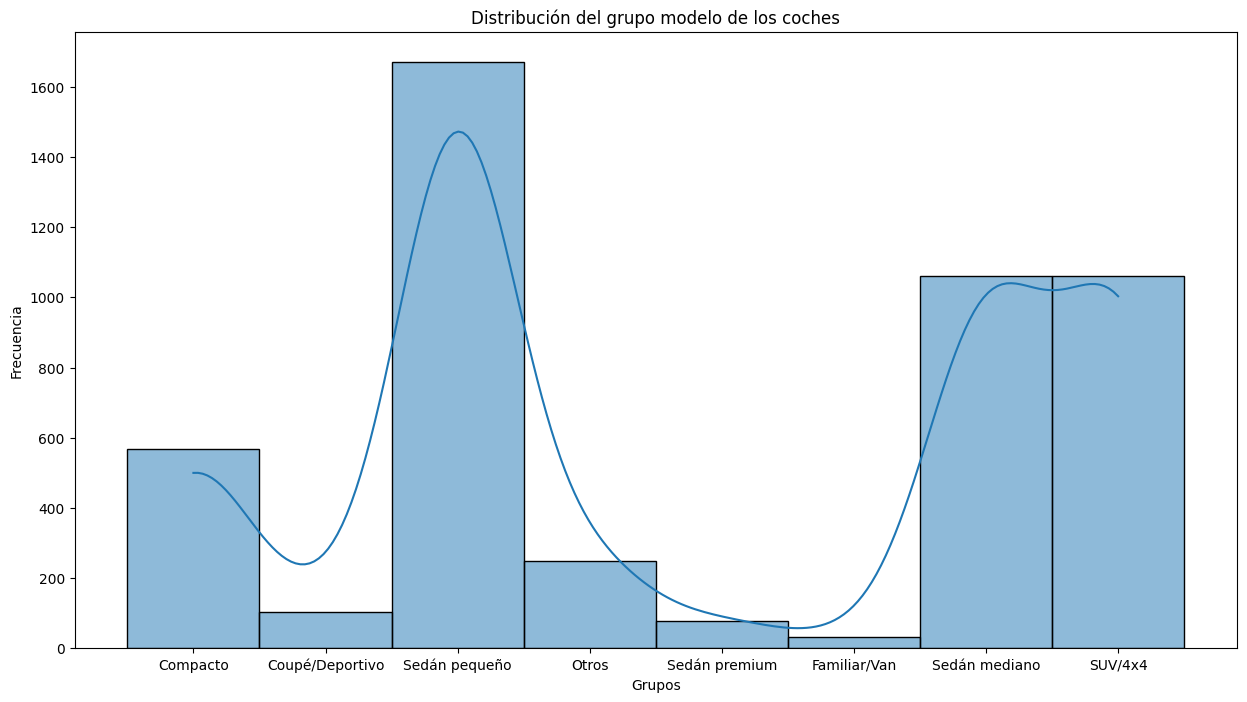

In [118]:
plt.figure(figsize=(15, 8))
sns.histplot(bmw_clean2['grupo_modelo'], kde=True, bins=30)
plt.title('Distribución del grupo modelo de los coches')
plt.xlabel('Grupos')
plt.ylabel('Frecuencia')
plt.show()

- Sedán pequeño y SUV/4x4 son los tipos de coche más comunes en el conjunto de datos, con una frecuencia significativamente alta en comparación con otros grupos. Esto indica que estas categorías son muy populares o abundantes en la muestra.

- Otros grupos, como Coupé/Deportivo, tienen una frecuencia mucho menor, lo que podría implicar que son menos comunes o que representan un nicho más específico.



### Relación entre combustible (tipo_gasolina) y precio

In [119]:
bmw_clean2["tipo_gasolina"].value_counts()

tipo_gasolina
diesel           4618
petrol            188
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64

Tenemos que agrupar las categorías de "Diesel" y "diesel".

In [120]:
# Agrupamos 'Diesel' con 'diesel' en la columna 'tipo_gasolina'
bmw_clean2['tipo_gasolina'] = bmw_clean2['tipo_gasolina'].replace('Diesel', 'diesel')

¿Cómo afecta el tipo de combustible al precio?

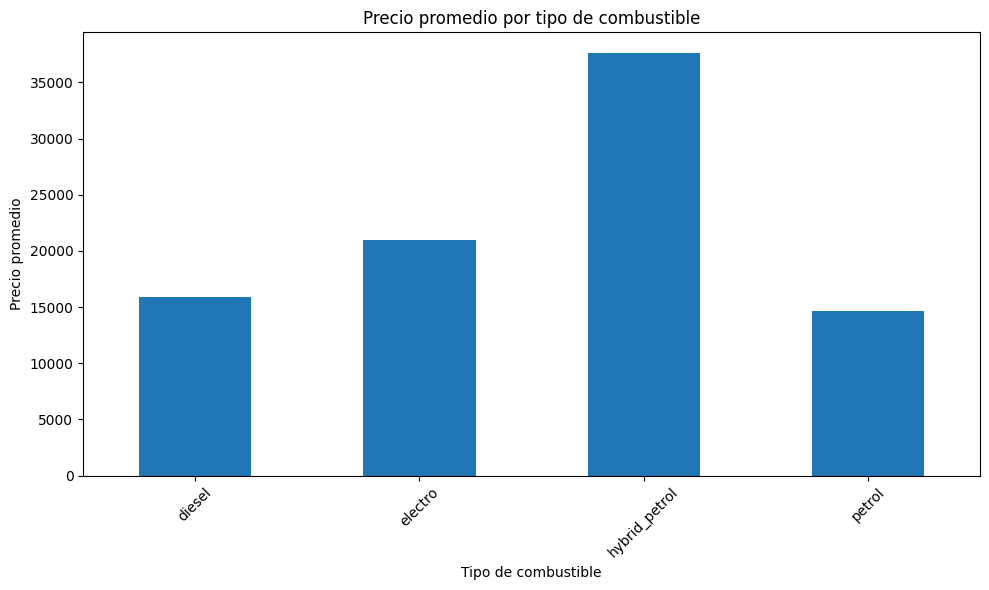

In [121]:
# Agrupar por tipo de combustible y calcular el precio promedio
precio_promedio_por_combustible = bmw_clean2.groupby('tipo_gasolina')['precio'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
precio_promedio_por_combustible.plot(kind='bar')
plt.title('Precio promedio por tipo de combustible')
plt.xlabel('Tipo de combustible')
plt.ylabel('Precio promedio')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout() # Ajustar el diseño para evitar que las etiquetas se superpongan
plt.show()

Los coches a gasolina o de diesel son más baratos que los eléctricos o híbridos, lo que puede reflejar las preferencias del mercado o los costos de tecnología.

### Relación entre potencia y grupo_modelo

/var/folders/2x/z03nqwh50hs66m43dm829y140000gn/T/ipykernel_2311/3336782452.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=bmw_clean2, x='grupo_modelo', y='potencia', palette='muted')


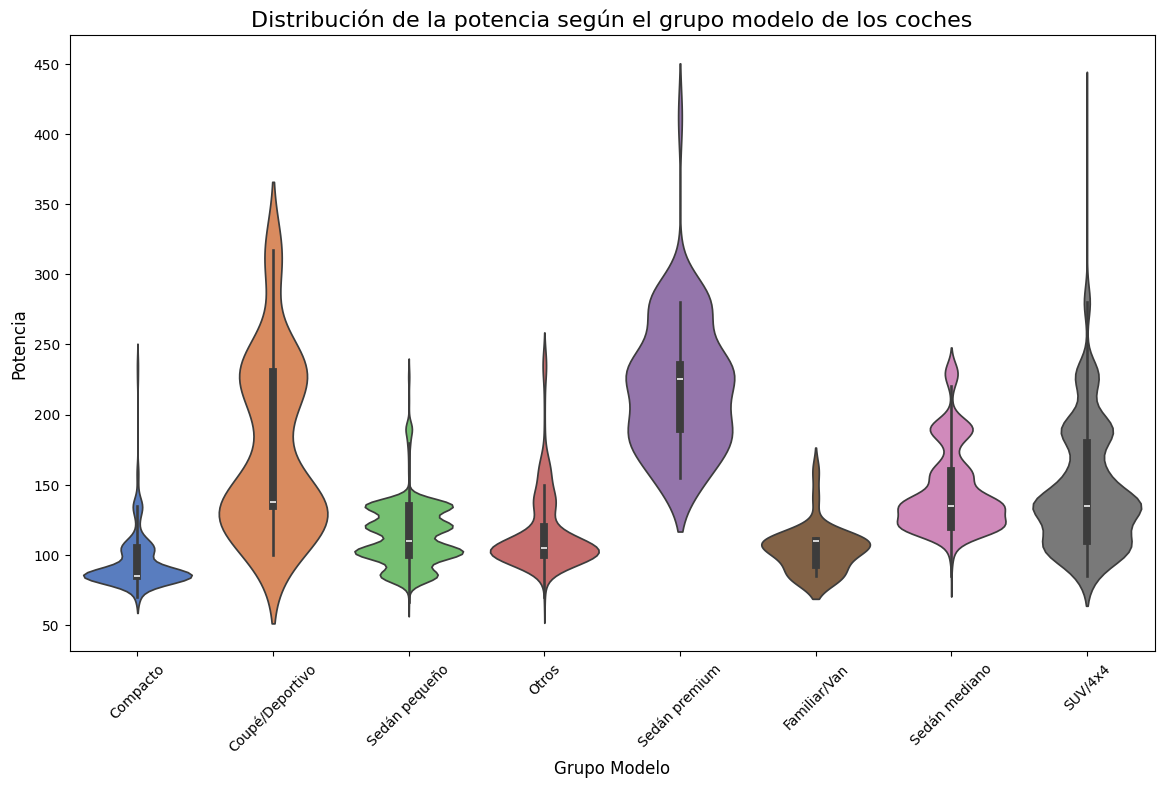

In [122]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crear un gráfico de violín
sns.violinplot(data=bmw_clean2, x='grupo_modelo', y='potencia', palette='muted')

# Añadir títulos y etiquetas
plt.title('Distribución de la potencia según el grupo modelo de los coches', fontsize=16)
plt.xlabel('Grupo Modelo', fontsize=12)
plt.ylabel('Potencia', fontsize=12)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


Los grupos que tienen potencias más altas son:
- Coupé/Deportivo
- Sedán premium

Los grupos que tienen potencias más bajas son:
- Compacto (en su mayoría)
- Sedán pequeño
- Otros
- Familiar/Van

El resto de grupos tienen una distribución más repartida, abarcando potencias altas y bajas:
- Sedán mediano
- SUV/4x4



## 4. Análisis de correlación inicial, ¿Hay alguna variable correlacionada?


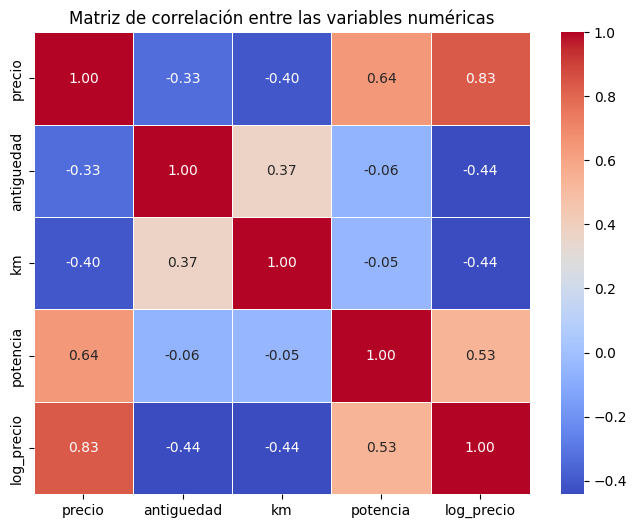

In [125]:
# Calcular la matriz de correlación
correlation_matrix = bmw_clean2[['precio', 'antiguedad', 'km','potencia', 'log_precio']].corr()

# Visualizamos la matriz de correlación con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre las variables numéricas")
plt.show()

### Correlaciones más relevantes

- **Precio y kilometraje**: Correlación de -0.40 (moderadamente negativa).  
  → Indica que, en general, los coches con mayor kilometraje tienden a tener un precio más bajo.

- **Precio y antigüedad**: Correlación de -0.33 (moderadamente negativa).  
  → A medida que aumenta la antigüedad del coche, su precio tiende a disminuir.

- **Antigüedad y kilometraje**: Correlación de 0.37 (moderadamente positiva).  
  → Es más probable que cuanto más antiguo sea un coche, más uso se le haya dado.

- **Precio y potencia**: Correlación de 0.64 (moderadamente fuerte).  
  → La potencia se comporta como un **buen predictor del precio**: los coches más potentes suelen tener un valor más elevado, probablemente por sus prestaciones y demanda.

- **Precio y log_price**: Correlación de 0.83 (fuerte).  
  → Aunque log_price es una transformación del precio, la alta correlación confirma que conserva su información. Sin embargo, presenta ventajas técnicas: reduce la asimetría y la heteroscedasticidad, facilitando el trabajo de modelos que asumen relaciones lineales.

---

Aunque estas correlaciones son moderadas, ninguna es perfecta. Esto sugiere que el precio de un coche es una variable influenciada por múltiples factores combinados, tales como:

- Modelo y segmento del vehículo  
- Kilometraje acumulado  
- Antigüedad  
- Equipamiento extra  
- Potencia del motor  
- O incluso aspectos más subjetivos como la estética o el prestigio de la versión

Esta exploración nos permite entender mejor qué variables tienen más peso a la hora de construir un modelo predictivo de precios, y nos orienta hacia un enfoque multivariable donde cada factor suma.


Posteriormente, cuando transformemos las variables categóricas a numéricas, volveremos a realizar este análisis y observaremos la totalidad de correlaciones.

## 5. Análisis variable vs target, ¿Hay algún insight interesante?




1. Precio vs. Kilometraje (km): Correlación de -0.40 (moderadamente negativa).
  - La correlación negativa entre el precio y el kilometraje puede indicar que los coches con mayor kilometraje suelen tener un precio más bajo. Esto tiene sentido, ya que los coches con más kilometraje tienden a ser más antiguos o haber tenido más uso, lo que reduce su valor.

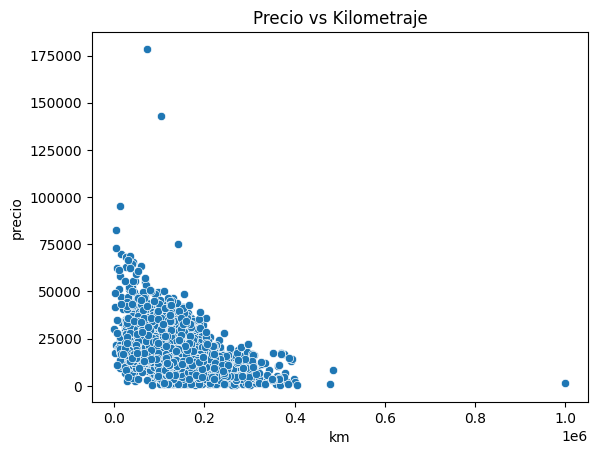

In [126]:
# precio vs km
sns.scatterplot(x='km', y='precio', data=bmw_clean2)
plt.title('Precio vs Kilometraje')
plt.show()


2. Precio vs. Antigüedad: Correlación de -0.33 (moderadamente negativa).
  - Si la correlación entre precio y antigüedad es negativa (lo cual es común), significa que los coches más antiguos generalmente tienen precios más bajos. Esto es consistente con la percepción del mercado: los coches nuevos o recientes suelen tener más valor debido a su menor desgaste y mayor demanda.

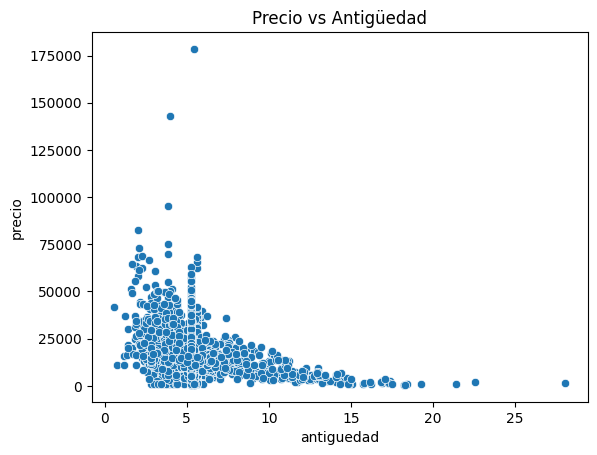

In [127]:
# precio vs antigüedad
sns.scatterplot(x='antiguedad', y='precio', data=bmw_clean2)
plt.title('Precio vs Antigüedad')
plt.show()


3. Precio vs. Potencia: correlación de 0.64 (moderadamente fuerte positiva).
  - Como ya se mencionó, una correlación positiva entre precio y potencia de 0.64 indica que los coches con mayor potencia tienden a ser más caros. Esto podría ser un indicativo de que los coches deportivos o de alta gama, que a menudo tienen una mayor potencia, tienen precios más elevados. Es probable que los consumidores valoren la potencia como una característica importante, especialmente en el segmento de vehículos de lujo o alto rendimiento.

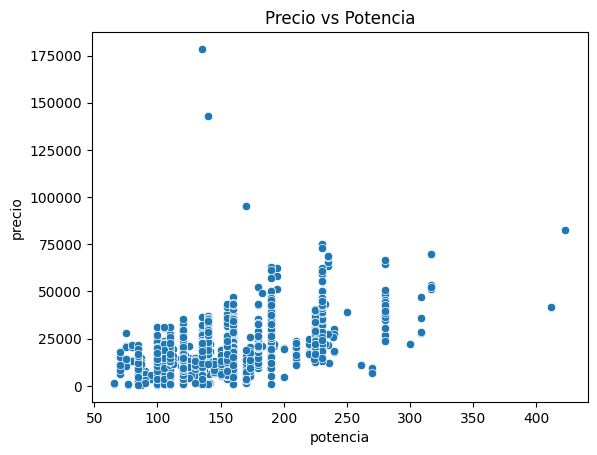

In [128]:
# Ejemplo para precio vs potencia
sns.scatterplot(x='potencia', y='precio', data=bmw_clean2)
plt.title('Precio vs Potencia')
plt.show()


4. Precio vs. grupo_modelo:
  - Al analizar la relación entre el precio y grupo_modelo, notamos que ciertos tipos de coches, como los Coupé/Deportivo o Sedanes premium, tienden a tener un precio más alto. Esto puede reflejar la demanda del mercado.
  - Por otro lado, modelos como los compactos tienen precios más bajos, lo cual es consistente con su orientación a un público más masivo y funcional.

/var/folders/2x/z03nqwh50hs66m43dm829y140000gn/T/ipykernel_2311/549370632.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=bmw_clean2, x='grupo_modelo', y='precio', palette='muted')


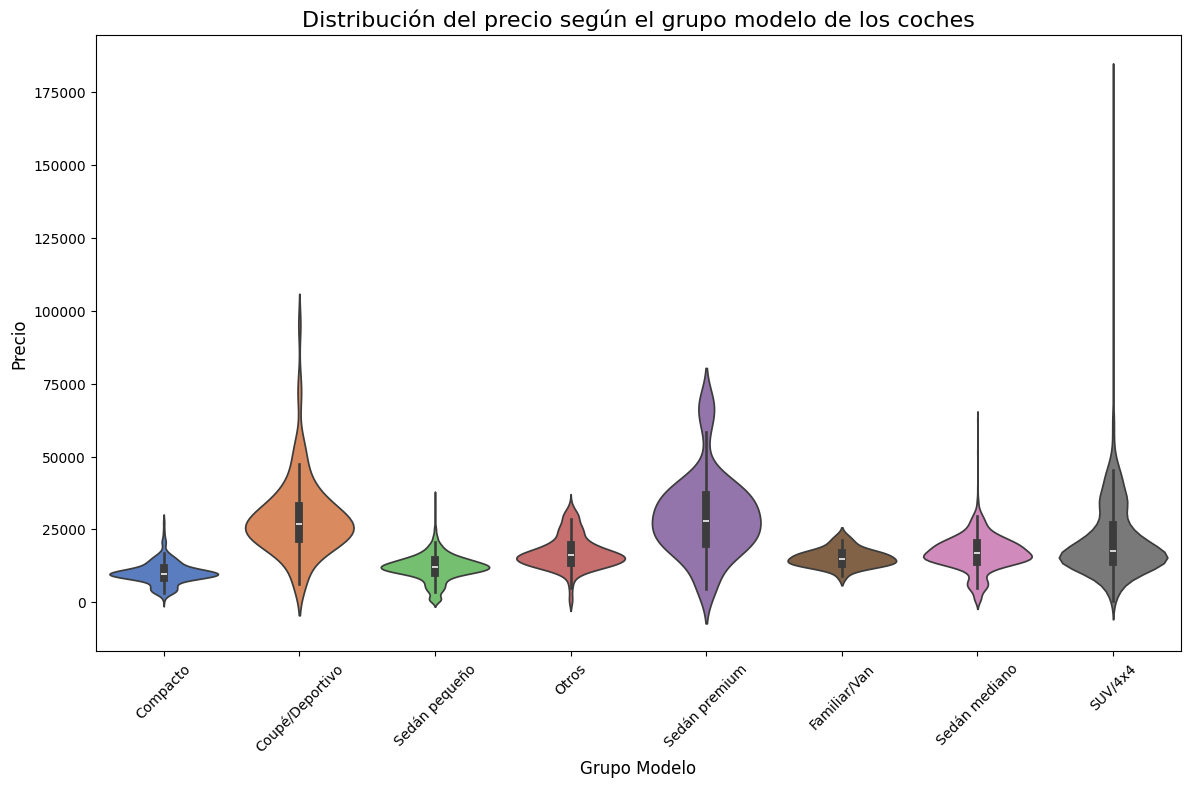

In [129]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crear un gráfico de violín
sns.violinplot(data=bmw_clean2, x='grupo_modelo', y='precio', palette='muted')

# Añadir títulos y etiquetas
plt.title('Distribución del precio según el grupo modelo de los coches', fontsize=16)
plt.xlabel('Grupo Modelo', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


5. Precio vs tipo_gasolina:

Diesel:

- Gran dispersión de precios.
- Una notable concentración de datos en la parte baja (vehículos de precio más bajo).
- Existen valores atípicos que llegan a precios altos.

Petrol (gasolina):

- Una distribución más compacta que diesel.
- Los precios tienden a concentrarse en un rango medio-bajo.

Hybrid Petrol (híbrido):

- Gran dispersión con precios que tienden a ser más altos.
- Concentración clara de precios medios.

Electro (eléctrico):

- Distribución pequeña debido probablemente a un menor número de datos.
- Precios menos variables comparados con otras categorías.


/var/folders/2x/z03nqwh50hs66m43dm829y140000gn/T/ipykernel_2311/4080486471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bmw_clean2, x='tipo_gasolina', y='precio', palette='muted')


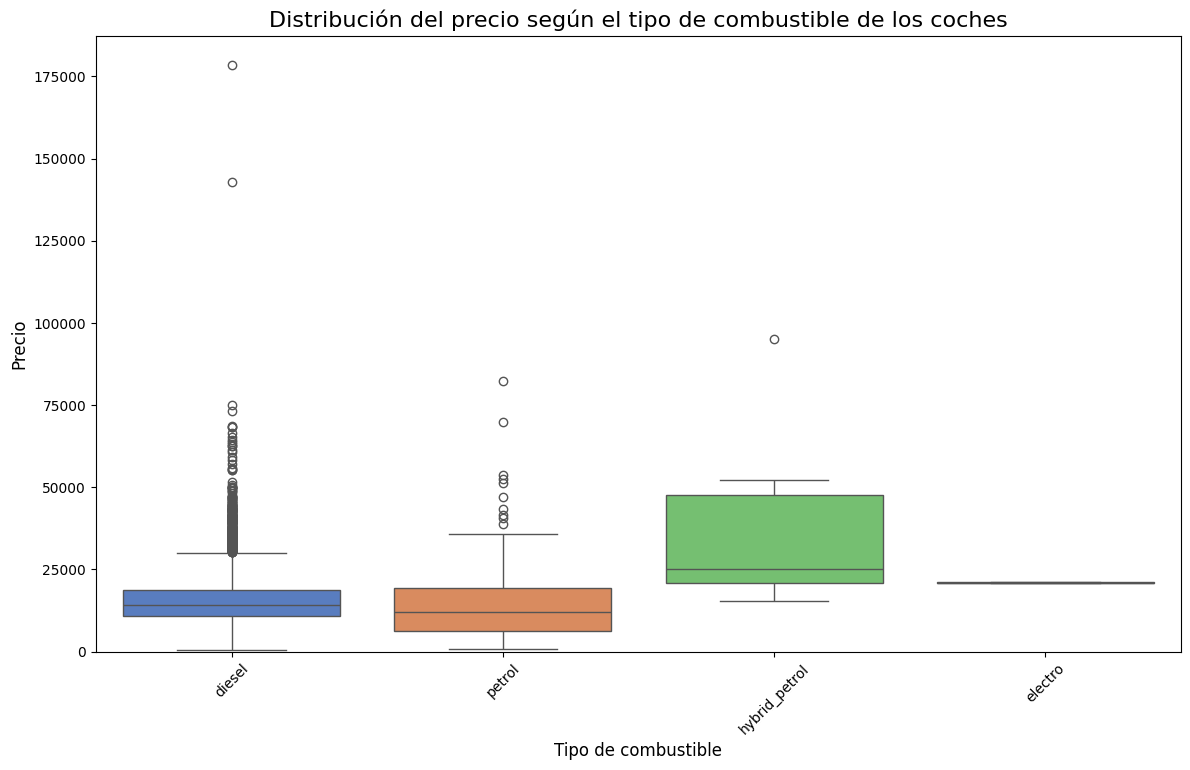

In [130]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crear un gráfico de caja
sns.boxplot(data=bmw_clean2, x='tipo_gasolina', y='precio', palette='muted')

# Ajustar límites del eje Y
plt.ylim(0, None)  # Asegura que el eje Y empiece en 0

# Añadir títulos y etiquetas
plt.title('Distribución del precio según el tipo de combustible de los coches', fontsize=16)
plt.xlabel('Tipo de combustible', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


/var/folders/2x/z03nqwh50hs66m43dm829y140000gn/T/ipykernel_2311/2772036708.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=bmw_clean2, x='tipo_gasolina', y='precio', palette='muted')


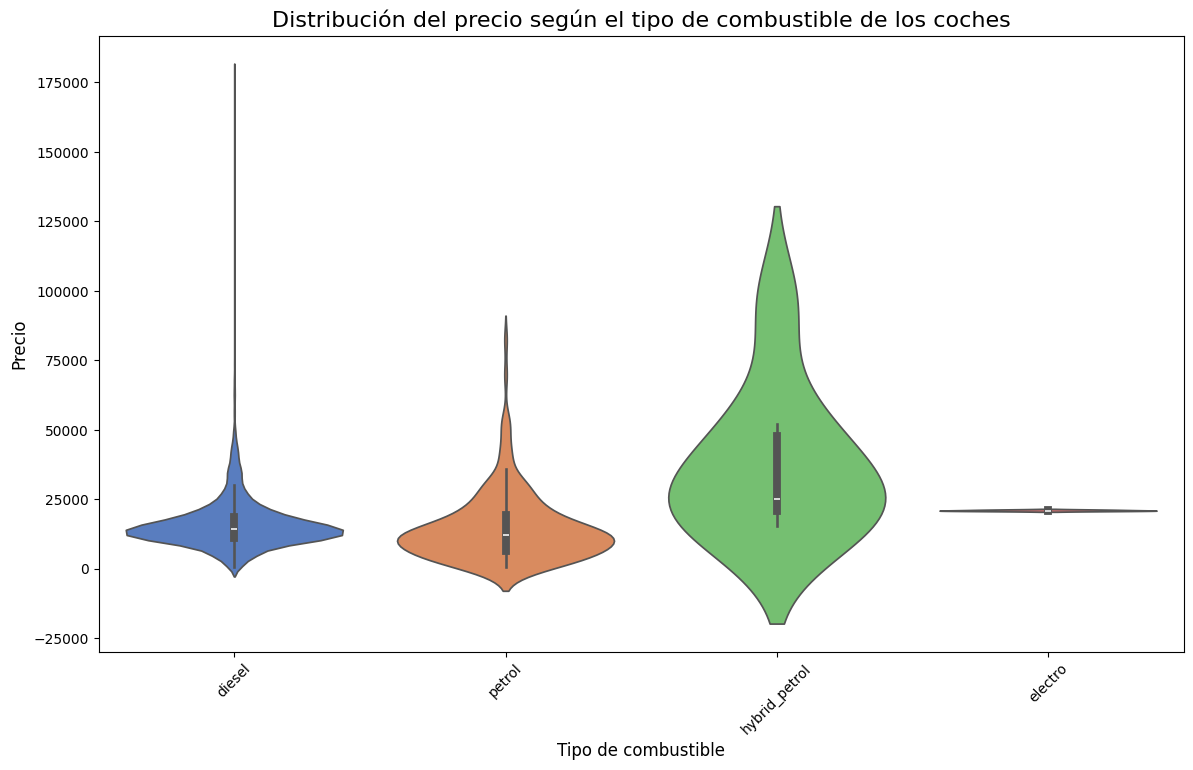

In [131]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crear un gráfico de violín
sns.violinplot(data=bmw_clean2, x='tipo_gasolina', y='precio', palette='muted')

# Añadir títulos y etiquetas
plt.title('Distribución del precio según el tipo de combustible de los coches', fontsize=16)
plt.xlabel('Tipo de combustible', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


Consultando en internet, los valores negativos visibles en el gráfico de violín probablemente sean generados por cómo Seaborn está configurando los ejes. Esto ocurre en ocasiones porque Seaborn extiende el rango del eje para acomodar la visualización (especialmente en gráficos de violín o boxplots).

In [134]:
bmw_clean2.describe()
# Al hacer un describe, observamos que no hay precios inferiores a 500 unidades monetarias

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad,log_precio
count,4.822000e+03,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000
mean,1.407344e+05,129.152426,0.551638,0.799668,0.201783,0.461219,0.242223,0.932393,0.547283,15880.485276,5.351319,9.520478
std,5.980756e+04,38.906061,0.497378,0.400290,0.401373,0.498545,0.428473,0.251096,0.497811,9195.694835,1.728224,0.603148
min,4.760000e+02,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.588638,6.216606
25%,1.028630e+05,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10900.000000,4.580424,9.296610
50%,1.409462e+05,120.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,14200.000000,5.445430,9.561068
75%,1.751518e+05,135.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,18700.000000,5.595346,9.836332
max,1.000376e+06,423.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,178500.000000,28.084873,12.092349


6. Precio vs color:

/var/folders/2x/z03nqwh50hs66m43dm829y140000gn/T/ipykernel_2311/4047553786.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=bmw_clean2, x='color', y='precio', palette='muted')


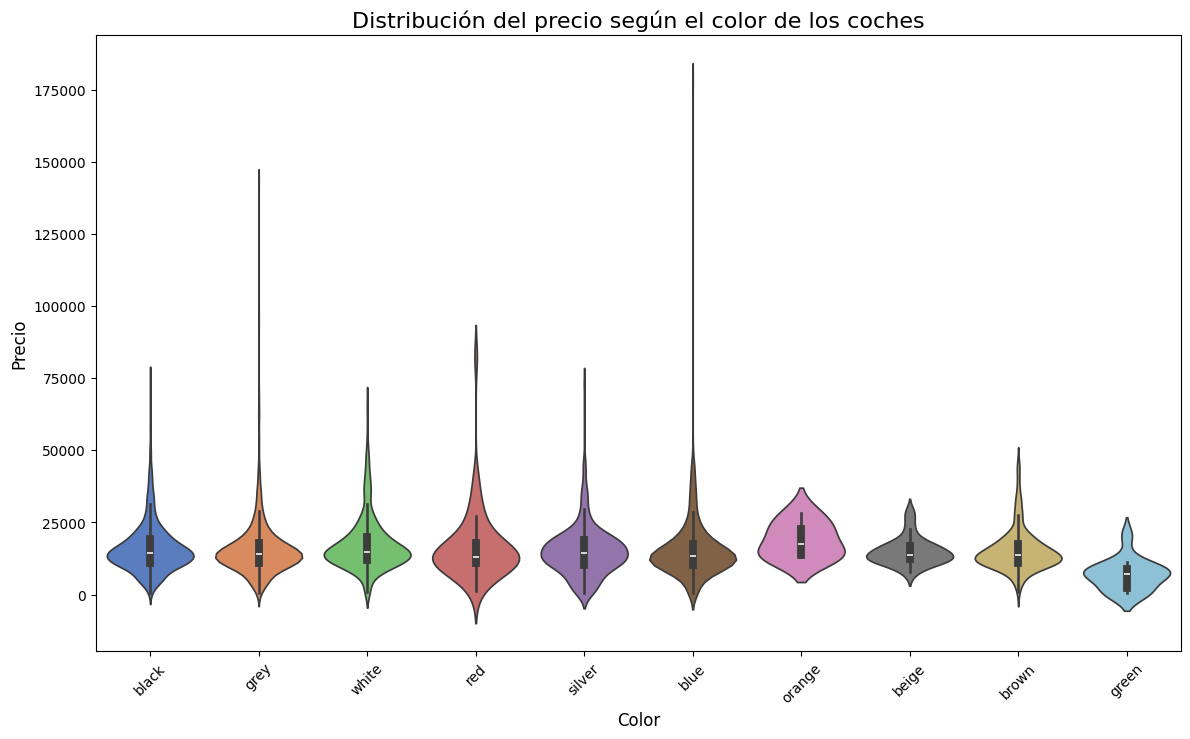

In [135]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crear un gráfico de violín
sns.violinplot(data=bmw_clean2, x='color', y='precio', palette='muted')

# Añadir títulos y etiquetas
plt.title('Distribución del precio según el color de los coches', fontsize=16)
plt.xlabel('Color', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


1. **Variedad en precios según el color:**
  - Los colores "blue" y "grey" presentan una mayor dispersión de precios, con colas más largas, lo que indica que hay modelos de ambos colores en rangos de precio más altos.
  - Los colores como "beige", "green", y "orange" tienen una menor dispersión y parecen estar asociados con un rango de precios más limitado.
2. **Colores con precios más bajos:**
  - Colores como "beige", "orange", y "brown" parecen estar concentrados en precios más bajos, ya que tienen violines más estrechos y centrados hacia la parte inferior de la escala.
3. **Colores con precios más altos:**
  - Los coches "blue" y "silver" no solo tienen una mayor dispersión, sino que también presentan medianas más altas, lo que podría indicar que los vehículos de estos colores son más costosos, en promedio.
4. **Preferencia y exclusividad de colores:**
  - Colores menos comunes como "beige" y "green" pueden estar asociados con una menor oferta o una mayor especificidad de modelos, pero no parecen estar vinculados a precios particularmente altos.
  - Colores más comunes como "black" y "grey" tienen una distribución amplia y mediana cercana al rango medio de precios.
5. **Extremos de precio:**
  - Aunque hay valores atípicos (outliers) hacia precios muy altos, como en "silver" y "blue", probablemente estén relacionados con modelos de lujo o de alta gama.

**Interpretación comercial:**
Los colores como "blue" y "silver" podrían asociarse a coches premium o más populares en segmentos de alto precio.
Colores como "orange", "beige", o "brown" podrían representar coches menos demandados o de menor valor percibido.


## 6. Transformación de categóricas a numéricas, ¿Qué variables van a transformar? ¿Que técnica se va usar?



Vamos a transformar en numéricas el resto de variables categóricas:
- tipo_gasolina
- color
- grupo_modelo

In [136]:
bmw_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4822 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   km                    4822 non-null   float64
 1   potencia              4822 non-null   float64
 2   tipo_gasolina         4822 non-null   object 
 3   color                 4822 non-null   object 
 4   volante_regulable     4822 non-null   int64  
 5   aire_acondicionado    4822 non-null   int64  
 6   camara_trasera        4822 non-null   int64  
 7   elevalunas_electrico  4822 non-null   int64  
 8   bluetooth             4822 non-null   int64  
 9   gps                   4822 non-null   int64  
 10  alerta_lim_velocidad  4822 non-null   int64  
 11  precio                4822 non-null   float64
 12  antiguedad            4822 non-null   float64
 13  grupo_modelo          4822 non-null   object 
 14  log_precio            4822 non-null   float64
dtypes: float64(5), int64(7), o

Vamos a usar la técnica de One-Hot Encoding ya que tipo_gasolina, color y grupo_modelo no tienen un orden lógico.

In [137]:
#Hacemos otra copia:
bmw_clean3 = bmw_clean2.copy()

In [138]:
# Usar One-Hot Encoding para las variables categóricas
bmw_onehotencoding = pd.get_dummies(bmw_clean3, columns=['tipo_gasolina', 'color', 'grupo_modelo'], drop_first=True)

# Ver las primeras filas del dataframe resultante
bmw_onehotencoding.head()


,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,color_red,color_silver,color_white,grupo_modelo_Coupé/Deportivo,grupo_modelo_Familiar/Van,grupo_modelo_Otros,grupo_modelo_SUV/4x4,grupo_modelo_Sedán mediano,grupo_modelo_Sedán pequeño,grupo_modelo_Sedán premium
0,140411.0,100.0,1,1,0,1,0,1,1,11300.0,...,False,False,False,False,False,False,False,False,False,False
1,13929.0,317.0,1,1,0,0,1,1,1,69700.0,...,False,False,False,True,False,False,False,False,False,False
2,183297.0,120.0,0,0,0,1,0,1,0,10200.0,...,False,False,True,False,False,False,False,False,True,False
3,128035.0,135.0,1,1,0,1,1,1,0,25100.0,...,True,False,False,True,False,False,False,False,False,False
4,97097.0,160.0,1,1,0,0,1,1,1,33400.0,...,False,True,False,False,False,True,False,False,False,False


In [139]:
bmw_onehotencoding.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4822 entries, 0 to 4842
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   km                            4822 non-null   float64
 1   potencia                      4822 non-null   float64
 2   volante_regulable             4822 non-null   int64  
 3   aire_acondicionado            4822 non-null   int64  
 4   camara_trasera                4822 non-null   int64  
 5   elevalunas_electrico          4822 non-null   int64  
 6   bluetooth                     4822 non-null   int64  
 7   gps                           4822 non-null   int64  
 8   alerta_lim_velocidad          4822 non-null   int64  
 9   precio                        4822 non-null   float64
 10  antiguedad                    4822 non-null   float64
 11  log_precio                    4822 non-null   float64
 12  tipo_gasolina_electro         4822 non-null   bool   
 13  tipo_gas

## 7. Escalar variables (usando minmaxscaler) y luego aplicar la correlación final de variables ¿Hay alguna variable finalmente correlacionada?


In [140]:
# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Seleccionar las columnas numéricas para escalar
numerical_columns = ['precio', 'km', 'potencia', 'antiguedad']

# Aplicar MinMaxScaler
bmw_onehotencoding[numerical_columns] = scaler.fit_transform(bmw_onehotencoding[numerical_columns])

# Ver las primeras filas después de la transformación
bmw_onehotencoding.head()


,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,color_red,color_silver,color_white,grupo_modelo_Coupé/Deportivo,grupo_modelo_Familiar/Van,grupo_modelo_Otros,grupo_modelo_SUV/4x4,grupo_modelo_Sedán mediano,grupo_modelo_Sedán pequeño,grupo_modelo_Sedán premium
0,0.139949,0.095238,1,1,0,1,0,1,1,0.060674,...,False,False,False,False,False,False,False,False,False,False
1,0.013454,0.703081,1,1,0,0,1,1,1,0.388764,...,False,False,False,True,False,False,False,False,False,False
2,0.182839,0.151261,0,0,0,1,0,1,0,0.054494,...,False,False,True,False,False,False,False,False,True,False
3,0.127572,0.193277,1,1,0,1,1,1,0,0.138202,...,True,False,False,True,False,False,False,False,False,False
4,0.096631,0.263305,1,1,0,0,1,1,1,0.184831,...,False,True,False,False,False,True,False,False,False,False


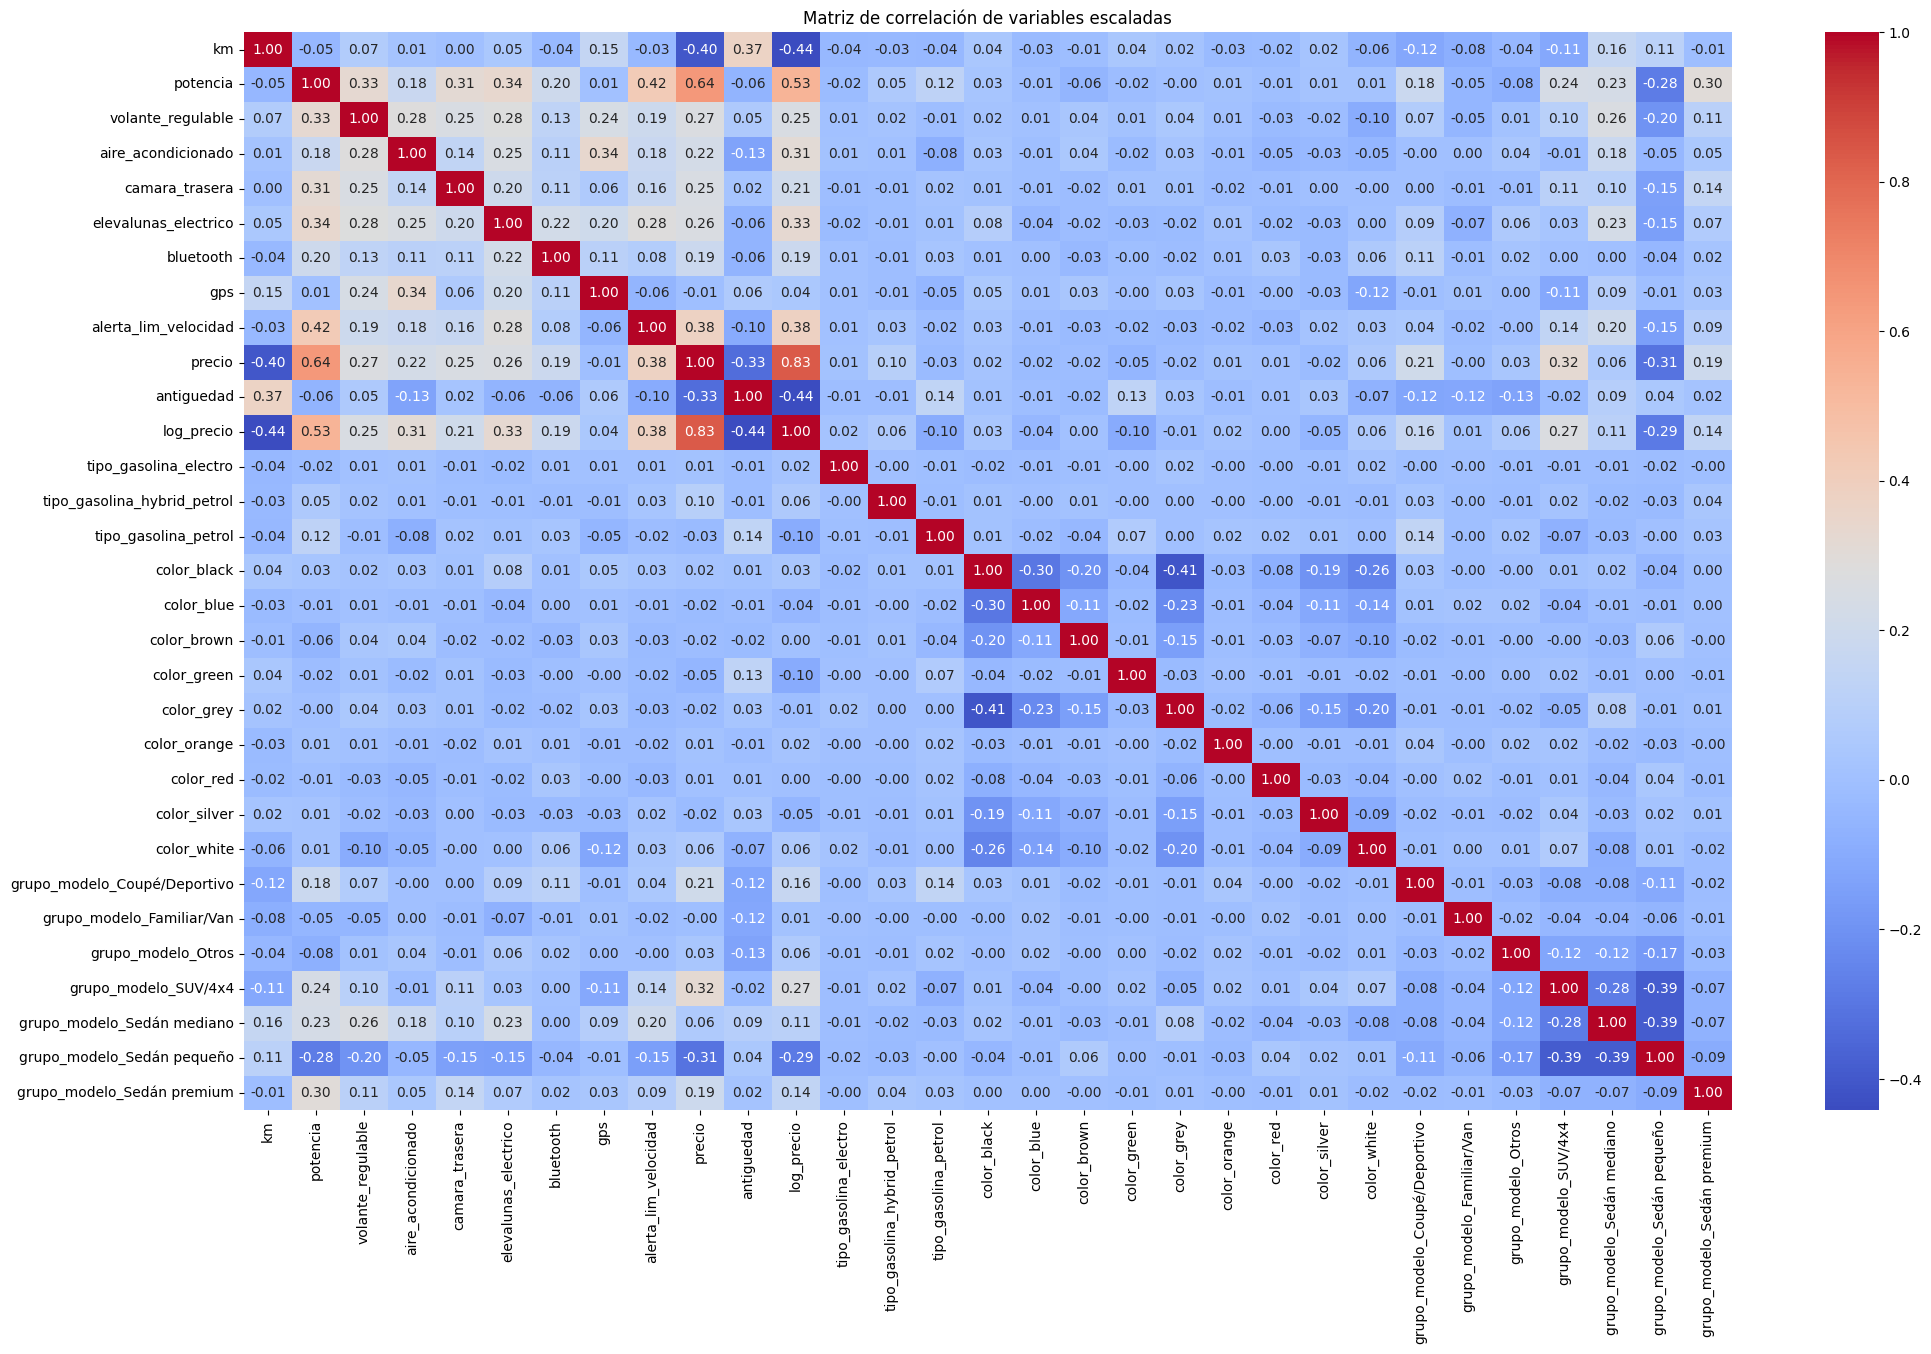

In [141]:
# Calcular la matriz de correlación de las variables escaladas
correlation_matrix = bmw_onehotencoding.corr()

plt.figure(figsize=(24, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación de variables escaladas')
plt.show()


### Correlaciones con el precio – Variables escaladas

A partir de la matriz de correlación de variables escaladas, se obtienen las siguientes observaciones destacadas respecto al precio:

- **Kilometraje**: Correlación negativa moderada de **-0.40**.  
  → A mayor kilometraje, menor es el precio del coche. Este resultado es esperable y coherente con la depreciación natural por uso.

- **Potencia**: Correlación positiva de **0.64**.  
  → Los coches con mayor potencia tienden a tener precios más elevados, lo que concuerda con su posicionamiento en gamas más altas o deportivas.

- **Extras del coche**  
  Las variables como `volante_regulable`, `aire_acondicionado`, `camara_trasera`, `elevalunas_electrico`, `bluetooth`, y `alerta_lim_velocidad` muestran correlaciones positivas con el precio, entre **0.17 y 0.38**.  
  → Esto indica que la presencia de ciertos extras incrementa el valor del coche.  
  → Curiosamente, el `gps` no presenta una correlación significativa, lo cual podría deberse a su estandarización en modelos recientes o a que no se percibe como un extra diferencial.

- **Combustible**:  
  `tipo_gasolina_hybrid_petrol` tiene una leve correlación positiva de **0.10**.  
  → Esto sugiere que los coches híbridos suelen tener precios algo más altos respecto a otras motorizaciones, posiblemente debido a su menor consumo y eficiencia energética.

- **Antigüedad**: Correlación negativa de **-0.33**.  
  → Confirma que los coches más antiguos tienden a tener un precio más bajo, en línea con la depreciación por año.

- **Segmento o grupo de modelo**:
  - `grupo_modelo_SUV/4X4`: Correlación positiva de **0.32**  
    → Este tipo de vehículo suele estar asociado a precios más altos, debido a su tamaño, potencia y demanda.
  - `grupo_modelo_Coupé/Deportivo`: Correlación de **0.21**  
    → Los coches deportivos o coupé suelen tener precios superiores por diseño, potencia o exclusividad.
  - `grupo_modelo_Sedán premium`: Correlación de **0.19**  
    → Este tipo de sedán también se asocia a precios más elevados, como corresponde a su orientación a una gama alta.
  - `grupo_modelo_Sedán pequeño`: Correlación negativa de **-0.31**  
    → Refleja que los sedanes pequeños son generalmente más económicos, lo que encaja con su enfoque más funcional y urbano.

---

Por último, cabe destacar que la variable `log_price`, resultado de aplicar una transformación logarítmica al precio original, mantiene una **alta correlación (0.83)** con el precio. Esto confirma que conserva la información esencial, pero con ventajas estadísticas: mejora la simetría de la distribución, reduce la varianza de los errores y puede facilitar el rendimiento de modelos lineales. Es por ello que se recomienda tenerla en cuenta como posible variable objetivo en el modelado.


### Consideración sobre las variables de color y la variable `log_price`

Las variables relacionadas con el **color del vehículo** no muestran una correlación destacada con el precio en la matriz de correlación. Esto podría llevarnos a plantear su eliminación como una opción razonable durante la selección de variables.

Sin embargo, antes de descartarlas de forma definitiva, conviene realizar un análisis más profundo. Algunas acciones recomendadas:

- **Análisis de importancia de características**  
  Utilizar modelos como **Random Forest** o **XGBoost**, que permiten calcular la importancia relativa de cada variable. Esto puede revelar si, aunque la correlación sea baja, las variables de color aportan información útil de forma no lineal o combinada.

- **Pruebas comparativas del modelo**  
  Entrenar el modelo tanto **con** como **sin** las variables de color y comparar su rendimiento (ej. RMSE, R², MAE). Si el modelo no pierde capacidad predictiva al excluirlas, su eliminación puede justificarse.

- **Evaluar la variable `log_price` como objetivo**  
  Aunque `price` y `log_price` están fuertemente correlacionados, el uso de `log_price` como variable objetivo puede mejorar la estabilidad del modelo y reducir errores en la predicción.  
  Se recomienda probar ambos enfoques y comparar el rendimiento para determinar cuál de las dos versiones permite construir un modelo más preciso y robusto.

Este enfoque basado en pruebas empíricas y análisis interpretables asegura una mejor toma de decisiones sobre las variables a mantener en el modelo final.


### Conclusiones y siguientes pasos

Tras realizar una limpieza exhaustiva y una exploración en profundidad del conjunto de datos de vehículos BMW, se pueden destacar las siguientes conclusiones clave:

- Se han eliminado variables redundantes o con baja relevancia, y se ha creado una variable de **antigüedad** más útil para el análisis que las fechas originales.
- Se ha transformado el precio con una escala logarítmica (`log_price`), lo que ha mejorado la distribución de la variable objetivo y ofrece ventajas para futuros modelos predictivos.
- Las variables más correlacionadas con el precio han sido: **potencia**, **kilometraje**, **antigüedad** y ciertos **extras** como cámara trasera, aire acondicionado o alerta de límite de velocidad.
- Se han detectado variables con baja correlación directa, como los colores del coche, que podrían descartarse si no aportan valor en fases posteriores.

#### Próximos pasos sugeridos

1. **Selección de variable objetivo**  
   Evaluar el rendimiento de modelos usando tanto `price` como `log_price` como variable objetivo para determinar cuál ofrece mejores resultados.

2. **Codificación y escalado final**  
   Verificar que todas las variables categóricas estén correctamente codificadas (OHE, LabelEncoding) y escalar las variables numéricas si se emplean modelos sensibles a la escala.

3. **Entrenamiento de modelos de regresión**  
   Probar diferentes algoritmos: regresión lineal, regularizada (Lasso, Ridge), Random Forest y XGBoost. Comparar métricas como MAE y RMSE.

4. **Evaluación de importancia de variables**  
   Usar modelos interpretables (como Random Forest o XGBoost) para identificar qué variables son más relevantes en la predicción del precio, lo que puede ayudar a justificar la inclusión o exclusión de ciertas columnas (como los colores).

5. **Validación cruzada y ajuste de hiperparámetros**  
   Incorporar validación cruzada y optimización de hiperparámetros para asegurar que el modelo final sea robusto y generalice bien.

---

Este análisis sienta las bases para construir un modelo predictivo del precio robusto, eficiente e interpretable, a partir de un dataset limpio, preprocesado y correctamente documentado.


## 8. Subir un pantallazo con el nombre de TODAS las columnas que tiene el dataframe final final vfin y el tipo de dato que tiene, tip lo más sencillo es hacer un .info al dataframe y tomarle un pantallazo y subirlo, importante deben aparecer TODAS las columnas


In [144]:
#reset index
bmw_onehotencoding = bmw_onehotencoding.reset_index(drop=True)

In [145]:
bmw_onehotencoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4822 entries, 0 to 4821
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   km                            4822 non-null   float64
 1   potencia                      4822 non-null   float64
 2   volante_regulable             4822 non-null   int64  
 3   aire_acondicionado            4822 non-null   int64  
 4   camara_trasera                4822 non-null   int64  
 5   elevalunas_electrico          4822 non-null   int64  
 6   bluetooth                     4822 non-null   int64  
 7   gps                           4822 non-null   int64  
 8   alerta_lim_velocidad          4822 non-null   int64  
 9   precio                        4822 non-null   float64
 10  antiguedad                    4822 non-null   float64
 11  log_precio                    4822 non-null   float64
 12  tipo_gasolina_electro         4822 non-null   bool   
 13  tip

## 9. Exportar en un excel de las primeras 50 filas del dataset (df.to_excel(...)


In [146]:
# Exportar las 50 primeras filas a excel:
bmw_onehotencoding.head(50).to_excel('bmw_onehotencoding.xlsx', index=False)

## 10. Sube el programa (el archivo .ipynb, NO EL PICKLE de lo contrario me quedaré sin espacio...) y con esto hemos terminado ;)



### Sabemos que no cuenta para nota... Pero por curiosidad hemos entrenado y probado el modelo jeje

In [147]:
bmw_modelo = bmw_onehotencoding.copy()

In [148]:
X = bmw_modelo.drop(columns=['precio'])  # Todas las columnas excepto la columna 'precio'
y = bmw_modelo['precio']  # La variable objetivo, 'precio'


In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [150]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)


LinearRegression()

In [151]:
# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)


In [154]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Mostrar las métricas de evaluación
print(f'MAE: {mae:.2}')
print(f'MSE: {mse:.2}')
print(f'RMSE: {rmse:.2}')


MAE: 0.013
MSE: 0.00044
RMSE: 0.021


### Métricas de evaluación del modelo

Tras entrenar y validar el modelo, se obtienen las siguientes métricas de error:

- **MAE (Mean Absolute Error)**: 0.013  
  → En promedio, el modelo se desvía en 0.013 unidades del valor real (en escala logarítmica).  
  Esta métrica es robusta frente a outliers y fácil de interpretar.

- **MSE (Mean Squared Error)**: 0.00044  
  → Penaliza más los errores grandes al elevarlos al cuadrado. Su bajo valor indica que no existen grandes desviaciones entre los valores reales y predichos.

- **RMSE (Root Mean Squared Error)**: 0.021  
  → Es la raíz cuadrada del MSE y tiene las mismas unidades que la variable objetivo. Permite comparar directamente con los valores reales. En este caso, un RMSE de 0.021 en escala logarítmica sugiere un error bajo relativo.

---

Estas métricas, junto con la visualización de predicciones vs. valores reales, indican que el modelo tiene un buen comportamiento y se ajusta correctamente a los datos, con una capacidad predictiva aceptable sobre el conjunto de test.


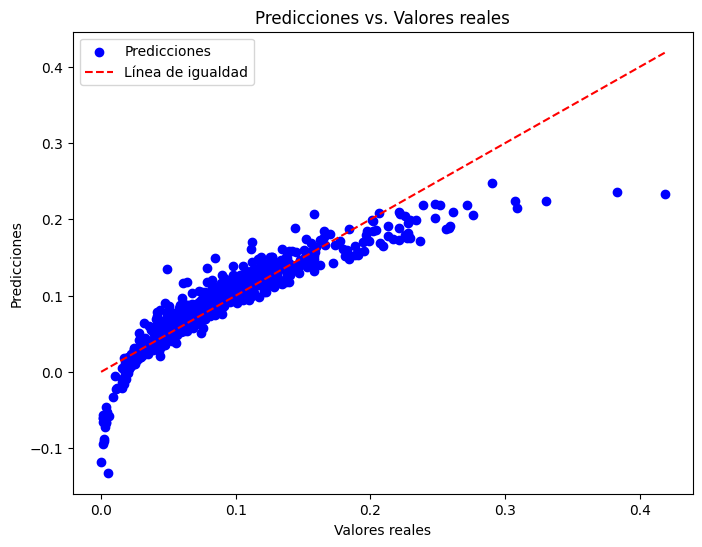

In [155]:
# Visualizar las predicciones con línea de referencia
plt.figure(figsize=(8, 6))

# Graficar los puntos reales vs predicciones
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')

# Añadir la línea de igualdad
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea de igualdad')

# Etiquetas y título
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores reales')
plt.legend()

# Mostrar el gráfico
plt.show()


### Visualización: Predicciones vs. Valores reales

En este gráfico se representa la relación entre los valores predichos por el modelo y los valores reales del conjunto de test. Se incluye además una **línea de igualdad** (en rojo) que marca dónde estarían los puntos si todas las predicciones fueran perfectas.

**Interpretación:**

- La mayoría de los puntos se alinean razonablemente cerca de la línea de igualdad, lo que indica que el modelo tiene una **buena capacidad predictiva general**.
- Se aprecia cierta dispersión en valores bajos y también una ligera tendencia a **subestimar** precios altos, lo cual es habitual cuando se trabaja con datos con cola larga o transformaciones logarítmicas.
- Este tipo de gráfica es muy útil para detectar **sesgos sistemáticos** (por ejemplo, si el modelo siempre sobreestima o subestima en ciertas zonas del rango de precios).

Este análisis gráfico complementa las métricas numéricas como MAE, MSE o RMSE, y permite validar visualmente el comportamiento del modelo.
